**Uma análise de redes dos institutos de economia da Unicamp e da UFRJ: um prisma da economia heterodoxa brasileira**

Rotina para avaliação da disciplina de *Social Network Analysis* (HO-450 B)

Autores: Anna Carolina Martins, Julia Alencar Omizzolo e Luan Lima Mugarte

A base de dados foi obtida em: <https://apps.webofknowledge.com/SCIELO_AdvancedSearch_input.do?SID=8B7VFuO4vi1WmhQ8UXF&product=SCIELO&search_mode=AdvancedSearch>.

Mais especificamente, a busca de dados foi refinada em área de pesquisa (Business & Economics) e organização (primeiramente Unicamp e depois UFRJ), gerando um arquivo de dados para cada universidade. O formato utilizado para a exportação dos dados do site é texto sem formatação (WIN, UTF-8). 

# Importando pacotes e funções necessários

Descrição dos pacotes:
\begin{itemize}
\item unidecode: utilizado para retirar acentuação dos nomes dos pesquisadores, considerando que a acentuação gerava problemas para identificação de nomes de pesquisadores iguais.

\item re: identifica padrões de objetos de texto (*strings*)

\item textdistance: identifica a distância ou similaridade entre *strings*, permitindo a identificação de nomes de pesquisadores parecidos

\item graph-tool e funções associadas: pacote de criação e visualização de grafos e estatísticas relacionadas

\item pandas: pacote que agrega um conjunto de funções para tratar DataFrames

\item seaborn, matplotlib e funções associadas: pacotes de visualização de dados

\item numpy: pacote de expressões e funções matemáticas do Python
\end{itemize}


In [1]:
# Pacotes
import unidecode
import re
import textdistance
import graph_tool as gt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Funções
from graph_tool.draw import graph_draw, graphviz_draw
from graph_tool import Graph, topology
%matplotlib inline

# Tratando os dados do IE - Unicamp

## Importando os dados

In [2]:
# Criando o caminho do arquivo de dados
path = 'Data/savedrecs.txt'

# É utilizada a função pd.read_csv, que importa os dados em um DataFrame. 
# Ademais, além do caminho para o arquivo, dois argumentos adicionais são dados:
## sep, que indica que o arquivo é separado por tabulação (\t)
## encoding, que indica que o arquivo é codificado em utf-8
df = pd.read_csv(path, sep='\t', encoding='utf-8')

## Tratando os dados

In [3]:
# Verificando os dados no DataFrame
df

PT  AU  \
J   Braga Junior, Sergio; Martínez, Marta Pagán; C... NaN   
J   Rocha, Leonardo Andrade; Khan, Ahmad Saeed; Li... NaN   
J                           Prates, Daniela Magalhães NaN   
J                             Romeiro, Ademar Ribeiro NaN   
J   Ramos Júnior, Flavio Paulino; Santos, Isabela ... NaN   
..                                                ...  ..   
J      Meirelles, Antonio J. A.; Lima, Gilberto Tadeu NaN   
J   Alexandre, Michel; Canuto, Otaviano; Silveira,... NaN   
J      Lima, Gilberto Tadeu; Meirelles, Antonio J. A. NaN   
J   Marçal, Emerson Fernandes; Pereira, Pedro Luiz... NaN   
J   Consoni, Flávia Luciane; Carvalho, Ruy de Quadros NaN   

                                                   BE  \
J   Greenwashing effect, attitudes, and beliefs in...   
J   O "efeito nefasto" da corrupção no Brasil: "qu...   
J                                        Apresentação   
J   Evitar o colapso ambiental requer o fim do cap...   
J   Capital structure of Brazilian public companie...   
..                                                ...   
J   Regimes de endividamento, fragilidade financei...   
J   Microfundamentos de falência de bancos atacadi...   
J   Mark-up bancário, conflito distributivo e util...   
J   Paridade do poder de compra: testando dados br...   
J   Desenvolvimento de produtos na indústria autom...   

                                                   TI   X1   Y1  \
J                                                 NaN  NaN  NaN   
J   The 'detrimental effect' of corruption in Braz...  NaN  NaN   
J                                                 NaN  NaN  NaN   
J                                                 NaN  NaN  NaN   
J   Estructura de capital de empresas brasileñas: ...  NaN  NaN   
..                                                ...  ...  ...   
J                                                 NaN  NaN  NaN   
J                                                 NaN  NaN  NaN   
J                                                 NaN  NaN  NaN   
J                                                 NaN  NaN  NaN   
J                                                 NaN  NaN  NaN   

                                        Z1          SO                LA  \
J                 RAUSP Management Journal     English  research-article   
J                            Nova Economia  Portuguese  research-article   
J                     Economia e Sociedade  Portuguese         editorial   
J                     Economia e Sociedade  Portuguese       book-review   
J              Contaduría y administración     English  research-article   
..                                     ...         ...               ...   
J           Estudos Econômicos (São Paulo)  Portuguese  research-article   
J           Estudos Econômicos (São Paulo)  Portuguese  research-article   
J           Revista Brasileira de Economia  Portuguese  research-article   
J           Revista Brasileira de Economia  Portuguese  research-article   
J   Revista de Administração Contemporânea  Portuguese  research-article   

                                                   DT  ...  \
J                                           Marketing  ...   
J   corruption; quantile regression; instrumental ...  ...   
J                                                 NaN  ...   
J                                                 NaN  ...   
J   Capital structure; Indebtedness; Corporate fin...  ...   
..                                                ...  ...   
J   indebtedness; financial fragility; productive ...  ...   
J   microfoundations of banking failures; banking ...  ...   
J                                                 NaN  ...   
J                                                 NaN  ...   
J   brazilian automotive industry; product develop...  ...   

                                   EP                             DI  \
J          10.1108/rausp-08-2018-0070                       Business   
J              10.1590/010

In [4]:
# Criando um index numérico crescente
df['ID'] = range(0, len(df))
df = df.set_index('ID')

In [5]:
# Retirando valores nulos (NaN)
df = df.dropna(axis=1, how='all')

In [6]:
# Verificando os dados para um artigo, a fim de obter as colunas relevantes
df.iloc[0]

PT    Braga Junior, Sergio; Martínez, Marta Pagán; C...
BE    Greenwashing effect, attitudes, and beliefs in...
TI                                                  NaN
X1                                                  NaN
Y1                                                  NaN
Z1                             RAUSP Management Journal
SO                                              English
LA                                     research-article
DT                                            Marketing
DE                                                  NaN
X5                                                  NaN
Y5                                                  NaN
Z5    Abstract Purpose The purpose of this paper is ...
AB                                                  NaN
X4                                                  NaN
Y4                                                  NaN
Z4    [Correa, Caroline Miranda] Universidade Estadu...
EM              , Sergio Silva Braga Junior/A-67

## Extraindo as colunas relevantes

In [7]:
# As colunas abaixo foram as colunas escolhidas como as relevantes para o trabalho

# Reajustando o DataFrame para conter somente as colunas escolhidas
df = df[['PT', 'BE', 'Z1', 'Z4', 'U2', 'PD']]

In [8]:
# Verificando o DataFrame
df

PT  \
ID                                                       
0    Braga Junior, Sergio; Martínez, Marta Pagán; C...   
1    Rocha, Leonardo Andrade; Khan, Ahmad Saeed; Li...   
2                            Prates, Daniela Magalhães   
3                              Romeiro, Ademar Ribeiro   
4    Ramos Júnior, Flavio Paulino; Santos, Isabela ...   
..                                                 ...   
227     Meirelles, Antonio J. A.; Lima, Gilberto Tadeu   
228  Alexandre, Michel; Canuto, Otaviano; Silveira,...   
229     Lima, Gilberto Tadeu; Meirelles, Antonio J. A.   
230  Marçal, Emerson Fernandes; Pereira, Pedro Luiz...   
231  Consoni, Flávia Luciane; Carvalho, Ruy de Quadros   

                                                    BE  \
ID                                                       
0    Greenwashing effect, attitudes, and beliefs in...   
1    O "efeito nefasto" da corrupção no Brasil: "qu...   
2                                         Apresentação   
3    Evitar o colapso ambiental requer o fim do cap...   
4    Capital structure of Brazilian public companie...   
..                                                 ...   
227  Regimes de endividamento, fragilidade financei...   
228  Microfundamentos de falência de bancos atacadi...   
229  Mark-up bancário, conflito distributivo e util...   
230  Paridade do poder de compra: testando dados br...   
231  Desenvolvimento de produtos na indústria autom...   

                                         Z1  \
ID                                            
0                  RAUSP Management Journal   
1                             Nova Economia   
2                      Economia e Sociedade   
3                      Economia e Sociedade   
4               Contaduría y administración   
..                                      ...   
227          Estudos Econômicos (São Paulo)   
228          Estudos Econômicos (São Paulo)   
229          Revista Brasileira de Economia   
230          Revista Brasileira de Economia   
231  Revista de Administração Contemporânea   

                                                    Z4  \
ID                                                       
0    [Correa, Caroline Miranda] Universidade Estadu...   
1    [Poz, Maria Ester Soares Dal] Universidade Est...   
2    [Prates, Daniela Magalhães] revista Economia e...   
3    [Romeiro, Ademar Ribeiro] Universidade Estadua...   
4    [Gaio, Luiz Eduardo] Universidade Estadual de ...   
..                                                 ...   
227  [Lima, Gilberto Tadeu] Universidade de São Pau...   
228  [Canuto, Otaviano] Universidade de São Paulo, ...   
229  [Meirelles, Antonio J. A.] Universidade Estadu...   
230  [Pereira, Pedro Luiz Valls] IBMEC Business Sch...   
231  [Carvalho, Ruy de Quadros] Universidade Estadu...   

                                                    U2    PD  
ID                                                            
0                            Universidade de São Paulo  2019  
1                                        Nova Economia  2019  
2    Instituto de Economia da Universidade Estadual...  2019  
3    Instituto de Economia da Universidade Estadual...  2019  
4        Facultad de Contaduría y Administración, UNAM  2019  
..                                                 ...   ...  
227  Faculdade de Economia, Administração e Contabi...  2003  
228  Faculdade de Economia, Administração e Contabi...  2003  
229                            Fundação Getúlio Vargas  2003  
230                            Fundação Getúlio Vargas  2003  
231  Associação Nacional dos Programas de Pós-gradu...  2002  

[232 rows x 6 columns]

In [9]:
# Nomeando as colunas
df.columns = [
    'autorcomacento', 'título', 'revista', 'universidade', 'localrevista',
    'ano'
]

## Criando listas e dicionários para a análise e construção dos grafos

### Lista de universidades

In [10]:
# Extraindo os nomes das universidades da respectiva coluna

listadeuniversidades = []
for i in range(len(df)):
    try:
        listadeuniversidades.append(
            df['universidade'][i].split('; ')[0].split('[')[1].split('] ')[1])
    except:
        listadeuniversidades.append(str(i))

In [11]:
# Agrupando somente o valores únicos na lista
listadeuniversidades = np.unique(listadeuniversidades)
listadeuniversidades = list(listadeuniversidades)

In [12]:
# Verificando a lista de universidades
# Como há vários valores númericos, optamos por não utilizar os dados de universidades para este trabalho.
listadeuniversidades

['109',
 '110',
 '120',
 '13',
 '130',
 '137',
 '166',
 '17',
 '173',
 '176',
 '178',
 '183',
 '201',
 '202',
 '23',
 '33',
 '39',
 '46',
 '59',
 '77',
 '88',
 'Banco Interamericano de Desenvolvimento, USA',
 'Centro Universitário FEI, Brazil',
 'Centro Universitário da Fundação Educacional Inaciana “Padre Sabóia de Medeiros”, Brazil',
 'Câmara Municipal de Diadema, Brasil',
 'Escola Superior de Propaganda e Marketing, Brazil',
 'Faculdades Alfa, Brasil',
 'Faculdades SPEI, Brasil',
 'Fundação Getúlio Vargas, Brazil',
 'Grupo de Estudos em Economia Industrial, Brazil',
 'Grupo de Pesquisa e Documentação sobre o Empresariamento da Saúde Henry Jouval Jr, Brasil',
 'IBMEC Business School',
 'Instituto Agronômico do Paraná, Brazil',
 'Instituto de Filosofia e Ciências Humanas',
 'Instituto de Pesquisa Econômica Aplicada, Brasil',
 'Instituto do Direito Púbico (IDP), Brazil',
 'Ministério da Ciência, Tecnologia e Inovação, Brazil',
 'Pontifícia Universidade Católica de Campinas, Brazil',
 '

### Dicionário para os *journals*

In [13]:
# Criando um dicionário para associar as revistas a um número específico (ID)
revistaid = {}

for i in range(len(df['revista'].unique())):
    k = df['revista'].unique()[i]
    v = i + 1
    revistaid[k] = v

revistaid

{'RAUSP Management Journal': 1,
 'Nova Economia': 2,
 'Economia e Sociedade': 3,
 'Contaduría y administración': 4,
 'Interações (Campo Grande)': 5,
 'Revista Contabilidade & Finanças': 6,
 'Brazilian Journal of Political Economy': 7,
 'BBR. Brazilian Business Review': 8,
 'Revista de Administração Contemporânea': 9,
 'Revista de Economia Contemporânea': 10,
 'Revista de Administração (São Paulo)': 11,
 'Revista de Gestão dos Países de Língua Portuguesa': 12,
 'América Latina en la historia económica': 13,
 'Revista de Administração de Empresas': 14,
 'Revista de Economia Política': 15,
 'Estudos Econômicos (São Paulo)': 16,
 'REAd. Revista Eletrônica de Administração (Porto Alegre)': 17,
 'RAM. Revista de Administração Mackenzie': 18,
 'BAR - Brazilian Administration Review': 19,
 'Revista de Administração Pública': 20,
 'Revista Brasileira de Economia': 21,
 'Pensamiento & Gestión': 22,
 'El trimestre económico': 23,
 'Revista Portuguesa e Brasileira de Gestão': 24,
 'Revista Brasile

In [14]:
# Criando a coluna 'revistaid' a partir do dicionário
for i in range(len(df)):
    for k, v in revistaid.items():
        if (df['revista'][i] == k):
            df.loc[i, 'revistaid'] = int(v)

In [15]:
# Verificando o DataFrame
df

autorcomacento  \
ID                                                       
0    Braga Junior, Sergio; Martínez, Marta Pagán; C...   
1    Rocha, Leonardo Andrade; Khan, Ahmad Saeed; Li...   
2                            Prates, Daniela Magalhães   
3                              Romeiro, Ademar Ribeiro   
4    Ramos Júnior, Flavio Paulino; Santos, Isabela ...   
..                                                 ...   
227     Meirelles, Antonio J. A.; Lima, Gilberto Tadeu   
228  Alexandre, Michel; Canuto, Otaviano; Silveira,...   
229     Lima, Gilberto Tadeu; Meirelles, Antonio J. A.   
230  Marçal, Emerson Fernandes; Pereira, Pedro Luiz...   
231  Consoni, Flávia Luciane; Carvalho, Ruy de Quadros   

                                                título  \
ID                                                       
0    Greenwashing effect, attitudes, and beliefs in...   
1    O "efeito nefasto" da corrupção no Brasil: "qu...   
2                                         Apresentação   
3    Evitar o colapso ambiental requer o fim do cap...   
4    Capital structure of Brazilian public companie...   
..                                                 ...   
227  Regimes de endividamento, fragilidade financei...   
228  Microfundamentos de falência de bancos atacadi...   
229  Mark-up bancário, conflito distributivo e util...   
230  Paridade do poder de compra: testando dados br...   
231  Desenvolvimento de produtos na indústria autom...   

                                    revista  \
ID                                            
0                  RAUSP Management Journal   
1                             Nova Economia   
2                      Economia e Sociedade   
3                      Economia e Sociedade   
4               Contaduría y administración   
..                                      ...   
227          Estudos Econômicos (São Paulo)   
228          Estudos Econômicos (São Paulo)   
229          Revista Brasileira de Economia   
230          Revista Brasileira de Economia   
231  Revista de Administração Contemporânea   

                                          universidade  \
ID                                                       
0    [Correa, Caroline Miranda] Universidade Estadu...   
1    [Poz, Maria Ester Soares Dal] Universidade Est...   
2    [Prates, Daniela Magalhães] revista Economia e...   
3    [Romeiro, Ademar Ribeiro] Universidade Estadua...   
4    [Gaio, Luiz Eduardo] Universidade Estadual de ...   
..                                                 ...   
227  [Lima, Gilberto Tadeu] Universidade de São Pau...   
228  [Canuto, Otaviano] Universidade de São Paulo, ...   
229  [Meirelles, Antonio J. A.] Universidade Estadu...   
230  [Pereira, Pedro Luiz Valls] IBMEC Business Sch...   
231  [Carvalho, Ruy de Quadros] Universidade Estadu...   

                                          localrevista   ano  revistaid  
ID                                                                       
0                            Universidade de São Paulo  2019        1.0  
1                                        Nova Economia  2019        2.0  
2    Instituto de Economia da Universidade Estadual...  2019        3.0  
3    Instituto de Economia da Universidade Estadual...  2019        3.0  
4        Facultad de Contaduría y Administración, UNAM  2019        4.0  
..                                                 ...   ...        ...  
227  Faculdade de Economia, Administração e Contabi...  2003       16.0  
228  Faculdade de Economia, Administração e Contabi...  2003       16.0  
229                            Fundação Getúlio Vargas  2003       21.0  
230                            Fundação Getúlio Vargas  2003       21.0  
231  Associação Nacional dos Programas de Pós-gradu...  2002        9.0  

[232 rows x 7 columns]

### DataFrame de artigos e respectivos autores e coautores

In [16]:
# Retirando acentuação dos nomes dos autores
df['autores'] = [unidecode.unidecode(df['autorcomacento'][i]).title() for i in range(len(df))]

del df['autorcomacento']

In [17]:
# Identificando o número máximo de coautores

max([len(df['autores'].str.split('; ')[i]) for i in range(len(df))]) - 1

7

In [18]:
# Verifica-se que a coluna de autores contém todos os nomes dos autores em um mesmo item do DataFrame. /
# É necessário separá-los.

# Criando listas de autor e respectivos coautores, com somente um item para cada nome de pesquisador.

# A lista de autor é facilmente criada.

autor = [df['autores'][i].split('; ')[0] for i in range(len(df))]

# Criar a lista de coautores é problemático. Como o número de coautores varia e como usamos a função /
# split e um indexador, essa combinação pode incorrer em IndexError ao utilizar um for loop. Logo,   /
# optamos por utilizar um for loop com a função try except para contornar eventuais IndexErrors. 

coautor1 = []
coautor2 = []
coautor3 = []
coautor4 = []
coautor5 = []
coautor6 = []
coautor7 = []

# Adicionando os coautores às listas
# É utilizado try no for loop porque o index da lista gera um erro caso este index não exista
for i in range(len(df)):
    # Primeira lista de coautores
    try:
        coautor1.append(df['autores'][i].split('; ')[1])
    except IndexError:
        coautor1.append('')

for i in range(len(df)):
    # Segunda lista de coautores
    try:
        coautor2.append(df['autores'][i].split('; ')[2])
    except IndexError:
        coautor2.append('')

for i in range(len(df)):
    # Terceira lista de coautores
    try:
        coautor3.append(df['autores'][i].split('; ')[3])
    except IndexError:
        coautor3.append('')

for i in range(len(df)):
    # Quarta lista de coautores
    try:
        coautor4.append(df['autores'][i].split('; ')[4])
    except IndexError:
        coautor4.append('')

for i in range(len(df)):
    # Quinta lista de coautores
    try:
        coautor5.append(df['autores'][i].split('; ')[5])
    except IndexError:
        coautor5.append('')

for i in range(len(df)):
    # Sexta lista de coautores
    try:
        coautor6.append(df['autores'][i].split('; ')[6])
    except IndexError:
        coautor6.append('')

for i in range(len(df)):
    # Sétima lista de coautores
    try:
        coautor7.append(df['autores'][i].split('; ')[7])
    except IndexError:
        coautor7.append('')

# Criando as respectivas colunas de autor e coautores no DataFrame.
df['autor'] = autor
df['coautor1'] = coautor1
df['coautor2'] = coautor2
df['coautor3'] = coautor3
df['coautor4'] = coautor4
df['coautor5'] = coautor5
df['coautor6'] = coautor6
df['coautor7'] = coautor7

In [19]:
# Verificando o DataFrame
df

título  \
ID                                                       
0    Greenwashing effect, attitudes, and beliefs in...   
1    O "efeito nefasto" da corrupção no Brasil: "qu...   
2                                         Apresentação   
3    Evitar o colapso ambiental requer o fim do cap...   
4    Capital structure of Brazilian public companie...   
..                                                 ...   
227  Regimes de endividamento, fragilidade financei...   
228  Microfundamentos de falência de bancos atacadi...   
229  Mark-up bancário, conflito distributivo e util...   
230  Paridade do poder de compra: testando dados br...   
231  Desenvolvimento de produtos na indústria autom...   

                                    revista  \
ID                                            
0                  RAUSP Management Journal   
1                             Nova Economia   
2                      Economia e Sociedade   
3                      Economia e Sociedade   
4               Contaduría y administración   
..                                      ...   
227          Estudos Econômicos (São Paulo)   
228          Estudos Econômicos (São Paulo)   
229          Revista Brasileira de Economia   
230          Revista Brasileira de Economia   
231  Revista de Administração Contemporânea   

                                          universidade  \
ID                                                       
0    [Correa, Caroline Miranda] Universidade Estadu...   
1    [Poz, Maria Ester Soares Dal] Universidade Est...   
2    [Prates, Daniela Magalhães] revista Economia e...   
3    [Romeiro, Ademar Ribeiro] Universidade Estadua...   
4    [Gaio, Luiz Eduardo] Universidade Estadual de ...   
..                                                 ...   
227  [Lima, Gilberto Tadeu] Universidade de São Pau...   
228  [Canuto, Otaviano] Universidade de São Paulo, ...   
229  [Meirelles, Antonio J. A.] Universidade Estadu...   
230  [Pereira, Pedro Luiz Valls] IBMEC Business Sch...   
231  [Carvalho, Ruy de Quadros] Universidade Estadu...   

                                          localrevista   ano  revistaid  \
ID                                                                        
0                            Universidade de São Paulo  2019        1.0   
1                                        Nova Economia  2019        2.0   
2    Instituto de Economia da Universidade Estadual...  2019        3.0   
3    Instituto de Economia da Universidade Estadual...  2019        3.0   
4        Facultad de Contaduría y Administración, UNAM  2019        4.0   
..                                                 ...   ...        ...   
227  Faculdade de Economia, Administração e Contabi...  2003       16.0   
228  Faculdade de Economia, Administração e Contabi...  2003       16.0   
229                            Fundação Getúlio Vargas  2003       21.0   
230                            Fundação Getúlio Vargas  2003       21.0   
231  Associação Nacional dos Programas de Pós-gradu...  2002        9.0   

                                               autores  \
ID                                                       
0    Braga Junior, Sergio; Martinez, Marta Pagan; C...   
1    Rocha, Leonardo Andrade; Khan, Ahmad Saeed; Li...   
2                            Prates, Daniela Magalhaes   
3                              Romeiro, Ademar Ribeiro   
4    Ramos Junior, Flavio Paulino; Santos, Isabela ...   
..                                                 ...   
227     Meirelles, Antonio J. A.; Lima, Gilberto Tadeu   
228  Alexandre, Michel; Canuto, Otaviano; Silveira,...   
229     Lima, Gilberto Tadeu; Meirelles, Antonio J. A.   
230  Marcal, Emerson Fernandes; Pereira, Pedro Luiz...   
231  Consoni, Flavia Luciane; Carvalho, Ruy De Quadros   

                            autor                   coautor1  \
ID                                                             
0            Braga Junior, Sergio      Martinez, Marta Pagan   
1  

In [20]:
# Verificando os diferentes valores da coluna 'coautor7'
df['coautor7'].unique()

array(['', 'Lima, Lucikelly Dos Santos'], dtype=object)

In [21]:
# Criando uma lista com todos os nomes dos autores e coautores
autores = autor + coautor1 + coautor2 + coautor3 + \
    coautor4 + coautor5 + coautor6 + coautor7

In [22]:
# Código para encontrar os valores únicos da lista de autores
autores = np.unique(autores)
autores = list(autores)

In [23]:
# Retirando o caso de quando há coautor inexistente, ou seja, um espaço vazio ('')
autores = autores[1:]

In [24]:
# Verificando a lista de autores e coautores
autores

['Abib, Gustavo',
 'Afonso, Jose Roberto',
 'Aggio, Gustavo De Oliveira',
 'Albuquerque, Eduardo Da Motta E',
 'Albuquerque, Marconi Edson Esmeraldo',
 'Alcadipani, Rafael',
 'Alcantara, Daniela P. R. De',
 'Alcantara, Wenersamy Ramos De',
 'Alderete, Veronica',
 'Alexandre, Michel',
 'Almeida, Carlos Alano Soares De',
 'Alves, Andre Cherubini',
 'Alves, Elia Elisa Cia',
 'Amitrano, Claudio Roberto',
 'Andrade, Daniel Caixeta',
 'Andrade, Rogerio P. De',
 'Andrade, Rogerio Pereira De',
 'Andrietta, Lucas Salvador',
 'Anunciacao, Pedro',
 'Arantes, Flavio',
 'Arruda, Jose Jobson De Andrade',
 'Assaf Neto, Alexandre',
 'Assis, Renato Linhares De',
 'Augusto De Souza, Paulo Ramalho',
 'Bacic, Miguel',
 'Baioco, Gisele Busichia',
 'Balestrin, Alsones',
 'Ballini, Rosangela',
 'Balsadi, Otavio Valentim',
 'Baltar, Paulo Eduardo',
 'Barbieux, Denise',
 'Barone, Ricardo Strazzacappa',
 'Barreto, Joao Carlos',
 'Barros, Amon Narciso De',
 'Bastos Jr., Ennio Ferreira',
 'Bastos, Pedro Paulo Zah

In [25]:
# Criando uma lista para os nomes dos autores separada em sobrenome e nomes.
autoressep = [autores[i].split(' ') for i in range(len(autores))]

# Verificando a lista
autoressep

[['Abib,', 'Gustavo'],
 ['Afonso,', 'Jose', 'Roberto'],
 ['Aggio,', 'Gustavo', 'De', 'Oliveira'],
 ['Albuquerque,', 'Eduardo', 'Da', 'Motta', 'E'],
 ['Albuquerque,', 'Marconi', 'Edson', 'Esmeraldo'],
 ['Alcadipani,', 'Rafael'],
 ['Alcantara,', 'Daniela', 'P.', 'R.', 'De'],
 ['Alcantara,', 'Wenersamy', 'Ramos', 'De'],
 ['Alderete,', 'Veronica'],
 ['Alexandre,', 'Michel'],
 ['Almeida,', 'Carlos', 'Alano', 'Soares', 'De'],
 ['Alves,', 'Andre', 'Cherubini'],
 ['Alves,', 'Elia', 'Elisa', 'Cia'],
 ['Amitrano,', 'Claudio', 'Roberto'],
 ['Andrade,', 'Daniel', 'Caixeta'],
 ['Andrade,', 'Rogerio', 'P.', 'De'],
 ['Andrade,', 'Rogerio', 'Pereira', 'De'],
 ['Andrietta,', 'Lucas', 'Salvador'],
 ['Anunciacao,', 'Pedro'],
 ['Arantes,', 'Flavio'],
 ['Arruda,', 'Jose', 'Jobson', 'De', 'Andrade'],
 ['Assaf', 'Neto,', 'Alexandre'],
 ['Assis,', 'Renato', 'Linhares', 'De'],
 ['Augusto', 'De', 'Souza,', 'Paulo', 'Ramalho'],
 ['Bacic,', 'Miguel'],
 ['Baioco,', 'Gisele', 'Busichia'],
 ['Balestrin,', 'Alsones']

In [26]:
# Criando um dicionário para associar o autor/coautor a um número (ID)
# Criando dicionário com os nomes dos autores
autoresid = {}
# Criando a primeira entrada do dicionário
k = autores[0]
autoresid[k] = 1
for i in range(1, len(autores)):
    k = autores[i]
    autoresid[k] = i + 1
    # Condicional para ajustar o ID de nomes semelhantes, porém diferentes
    if textdistance.damerau_levenshtein.normalized_similarity(
            autoressep[i - 1][0], autoressep[i][0]) > 0.7:
        if textdistance.damerau_levenshtein.normalized_similarity(
                autoressep[i - 1][1], autoressep[i][1]) > 0.7:
            autoresid[k] = i
    else:
        continue

In [27]:
# Verificando o dicionário
autoresid

{'Abib, Gustavo': 1,
 'Afonso, Jose Roberto': 2,
 'Aggio, Gustavo De Oliveira': 3,
 'Albuquerque, Eduardo Da Motta E': 4,
 'Albuquerque, Marconi Edson Esmeraldo': 5,
 'Alcadipani, Rafael': 6,
 'Alcantara, Daniela P. R. De': 7,
 'Alcantara, Wenersamy Ramos De': 8,
 'Alderete, Veronica': 9,
 'Alexandre, Michel': 10,
 'Almeida, Carlos Alano Soares De': 11,
 'Alves, Andre Cherubini': 12,
 'Alves, Elia Elisa Cia': 13,
 'Amitrano, Claudio Roberto': 14,
 'Andrade, Daniel Caixeta': 15,
 'Andrade, Rogerio P. De': 16,
 'Andrade, Rogerio Pereira De': 16,
 'Andrietta, Lucas Salvador': 18,
 'Anunciacao, Pedro': 19,
 'Arantes, Flavio': 20,
 'Arruda, Jose Jobson De Andrade': 21,
 'Assaf Neto, Alexandre': 22,
 'Assis, Renato Linhares De': 23,
 'Augusto De Souza, Paulo Ramalho': 24,
 'Bacic, Miguel': 25,
 'Baioco, Gisele Busichia': 26,
 'Balestrin, Alsones': 27,
 'Ballini, Rosangela': 28,
 'Balsadi, Otavio Valentim': 29,
 'Baltar, Paulo Eduardo': 30,
 'Barbieux, Denise': 31,
 'Barone, Ricardo Strazzaca

In [28]:
# Arrumando casos manualmente
# Por exemplo, nomes ou sobrenomes escritos de forma errada ou abreviada
# Por exemplo, autores com nomes e sobrenomes iguais, porém autores diferentes
autoresid['Biasoto Junior, Geraldo'] = 45
autoresid['Coutinho, Mauricio Chalflin'] = 88
autoresid['Deos, Simone Silva De'] = 101
autoresid['Maia, Alexandre Gori'] = 179
autoresid['Moraes, Gustavo Inacio De'] = 202  # Falso Positivo
autoresid['Salles Filho, Sergio Luiz Monteiro'] = 272
autoresid['Santos Filho, Otaviano Canuto Dos'] = 63
autoresid['Silva, Ana Lucia Goncalves Da'] = 288  # Falso Positivo
autoresid['Silveira, Jose Maria Ferreira Jardim Da'] = 296

In [29]:
# Verificando o dicionário
autoresid

{'Abib, Gustavo': 1,
 'Afonso, Jose Roberto': 2,
 'Aggio, Gustavo De Oliveira': 3,
 'Albuquerque, Eduardo Da Motta E': 4,
 'Albuquerque, Marconi Edson Esmeraldo': 5,
 'Alcadipani, Rafael': 6,
 'Alcantara, Daniela P. R. De': 7,
 'Alcantara, Wenersamy Ramos De': 8,
 'Alderete, Veronica': 9,
 'Alexandre, Michel': 10,
 'Almeida, Carlos Alano Soares De': 11,
 'Alves, Andre Cherubini': 12,
 'Alves, Elia Elisa Cia': 13,
 'Amitrano, Claudio Roberto': 14,
 'Andrade, Daniel Caixeta': 15,
 'Andrade, Rogerio P. De': 16,
 'Andrade, Rogerio Pereira De': 16,
 'Andrietta, Lucas Salvador': 18,
 'Anunciacao, Pedro': 19,
 'Arantes, Flavio': 20,
 'Arruda, Jose Jobson De Andrade': 21,
 'Assaf Neto, Alexandre': 22,
 'Assis, Renato Linhares De': 23,
 'Augusto De Souza, Paulo Ramalho': 24,
 'Bacic, Miguel': 25,
 'Baioco, Gisele Busichia': 26,
 'Balestrin, Alsones': 27,
 'Ballini, Rosangela': 28,
 'Balsadi, Otavio Valentim': 29,
 'Baltar, Paulo Eduardo': 30,
 'Barbieux, Denise': 31,
 'Barone, Ricardo Strazzaca

In [30]:
# Criando a coluna de autor com o ID
df['autor'] = df['autor'].map(autoresid)

# Criando as colunas de coautores com ID
for t in range(1, max([len(df['autores'].str.split('; ')[i]) for i in range(len(df))])):
    string = 'coautor' + str(t)
    df[string] = df[string].map(autoresid).fillna('')

In [31]:
# Verificando o DataFrame
df 

título  \
ID                                                       
0    Greenwashing effect, attitudes, and beliefs in...   
1    O "efeito nefasto" da corrupção no Brasil: "qu...   
2                                         Apresentação   
3    Evitar o colapso ambiental requer o fim do cap...   
4    Capital structure of Brazilian public companie...   
..                                                 ...   
227  Regimes de endividamento, fragilidade financei...   
228  Microfundamentos de falência de bancos atacadi...   
229  Mark-up bancário, conflito distributivo e util...   
230  Paridade do poder de compra: testando dados br...   
231  Desenvolvimento de produtos na indústria autom...   

                                    revista  \
ID                                            
0                  RAUSP Management Journal   
1                             Nova Economia   
2                      Economia e Sociedade   
3                      Economia e Sociedade   
4               Contaduría y administración   
..                                      ...   
227          Estudos Econômicos (São Paulo)   
228          Estudos Econômicos (São Paulo)   
229          Revista Brasileira de Economia   
230          Revista Brasileira de Economia   
231  Revista de Administração Contemporânea   

                                          universidade  \
ID                                                       
0    [Correa, Caroline Miranda] Universidade Estadu...   
1    [Poz, Maria Ester Soares Dal] Universidade Est...   
2    [Prates, Daniela Magalhães] revista Economia e...   
3    [Romeiro, Ademar Ribeiro] Universidade Estadua...   
4    [Gaio, Luiz Eduardo] Universidade Estadual de ...   
..                                                 ...   
227  [Lima, Gilberto Tadeu] Universidade de São Pau...   
228  [Canuto, Otaviano] Universidade de São Paulo, ...   
229  [Meirelles, Antonio J. A.] Universidade Estadu...   
230  [Pereira, Pedro Luiz Valls] IBMEC Business Sch...   
231  [Carvalho, Ruy de Quadros] Universidade Estadu...   

                                          localrevista   ano  revistaid  \
ID                                                                        
0                            Universidade de São Paulo  2019        1.0   
1                                        Nova Economia  2019        2.0   
2    Instituto de Economia da Universidade Estadual...  2019        3.0   
3    Instituto de Economia da Universidade Estadual...  2019        3.0   
4        Facultad de Contaduría y Administración, UNAM  2019        4.0   
..                                                 ...   ...        ...   
227  Faculdade de Economia, Administração e Contabi...  2003       16.0   
228  Faculdade de Economia, Administração e Contabi...  2003       16.0   
229                            Fundação Getúlio Vargas  2003       21.0   
230                            Fundação Getúlio Vargas  2003       21.0   
231  Associação Nacional dos Programas de Pós-gradu...  2002        9.0   

                                               autores  autor coautor1  \
ID                                                                       
0    Braga Junior, Sergio; Martinez, Marta Pagan; C...     52      185   
1    Rocha, Leonardo Andrade; Khan, Ahmad Saeed; Li...    255      156   
2                            Prates, Daniela Magalhaes    241            
3                              Romeiro, Ademar Ribeiro    259            
4    Ramos Junior, Flavio Paulino; Santos, Isabela ...    244      280   
..                                                 ...    ...      ...   
227     Meirelles, Antonio J. A.; Lima, Gilberto Tadeu    190      164   
228  Alexandre, Michel; Canuto, Otaviano; Silveira,...     10       63   
229     Lima, Gilberto Tadeu; Meirelles, Antonio J. A.    164      190   
230  Marcal, Emerson Fernandes; Pereira, Pedro Luiz...    183      231   
231  Consoni, Flavia Luciane; Carvalho, Ruy De Quadros     79 

### Lista de número de artigos por autor/coautor

In [32]:
# Lista de todos os ID's de autores
list(np.unique(list(autoresid.values())))

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 45,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 101,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 168,
 169,
 171,
 172,
 173,
 174,
 175,
 176,
 178,
 179,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 2

In [33]:
# Dimensão dessa lista
len(list(np.unique(list(autoresid.values()))))

303

In [34]:
# Criando um dicionário que associa o número de artigos publicados por autor ao seu ID
nartigos = {}
for i in list(np.unique(list(autoresid.values()))):
    k = i
    v = df.loc[df['autor'] == i].autor.count()
    for t in range(1, 8):
        string = 'coautor' + str(t)
        v = v + df.loc[df[string] == i].autor.count()
        nartigos[k] = v

In [35]:
# Verificando o dicionário
nartigos

{1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 10: 1,
 11: 2,
 12: 1,
 13: 1,
 14: 1,
 15: 2,
 16: 9,
 18: 1,
 19: 1,
 20: 2,
 21: 1,
 22: 1,
 23: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 4,
 29: 1,
 30: 1,
 31: 1,
 32: 1,
 33: 1,
 34: 1,
 35: 1,
 36: 5,
 37: 1,
 38: 1,
 39: 1,
 40: 3,
 41: 1,
 42: 1,
 43: 4,
 45: 3,
 48: 1,
 49: 1,
 50: 1,
 51: 1,
 52: 1,
 53: 1,
 54: 1,
 55: 1,
 56: 1,
 57: 2,
 58: 1,
 59: 1,
 60: 1,
 61: 1,
 62: 5,
 63: 2,
 64: 1,
 65: 2,
 67: 1,
 68: 1,
 69: 1,
 70: 1,
 71: 1,
 72: 4,
 73: 1,
 74: 1,
 75: 1,
 76: 3,
 77: 2,
 78: 1,
 79: 2,
 80: 3,
 82: 1,
 83: 1,
 84: 2,
 85: 1,
 86: 1,
 87: 2,
 88: 6,
 91: 1,
 92: 2,
 93: 1,
 94: 1,
 95: 1,
 96: 1,
 97: 1,
 98: 1,
 99: 6,
 101: 4,
 104: 2,
 105: 1,
 106: 1,
 107: 1,
 108: 1,
 109: 3,
 110: 1,
 111: 1,
 112: 2,
 113: 2,
 114: 1,
 115: 1,
 116: 1,
 117: 1,
 118: 2,
 120: 1,
 121: 1,
 122: 1,
 123: 1,
 124: 2,
 125: 1,
 126: 3,
 127: 1,
 128: 2,
 129: 1,
 130: 3,
 131: 2,
 132: 1,
 133: 1,
 134: 1,
 1

### Lista de edges

In [36]:
# Criando uma lista dos edges a serem desenhados, associando o ID do autor com os respectivos ID's de seus coautores

# Cabe ressaltar que os autores que não possuem coautores (artigos de 1 só autor) são ignorados aqui. 
# Eles serão adicionados mais tarde.

edges = []
for t in range(
    1,
        (max([len(df['autores'].str.split('; ')[i]) for i in range(len(df))]))):
    for i in df[df['coautor' + str(t)] != ''][['autor', 'coautor' + str(t)
                                               ]].itertuples(index=False,
                                                             name=None):
        edges.append(i)

In [37]:
# Verificando as edges
edges

[(52, 185.0),
 (255, 156.0),
 (244, 280.0),
 (240, 113.0),
 (37, 181.0),
 (179, 270.0),
 (49, 220.0),
 (308, 248.0),
 (184, 312.0),
 (83, 234.0),
 (61, 206.0),
 (155, 179.0),
 (268, 259.0),
 (277, 289.0),
 (163, 118.0),
 (201, 149.0),
 (255, 156.0),
 (266, 40.0),
 (54, 220.0),
 (210, 289.0),
 (20, 45.0),
 (286, 64.0),
 (248, 112.0),
 (76, 288.0),
 (299, 176.0),
 (176, 28.0),
 (178, 142.0),
 (60, 75.0),
 (154, 281.0),
 (323, 241.0),
 (224, 16.0),
 (12, 31.0),
 (45, 2.0),
 (68, 82.0),
 (175, 58.0),
 (241, 227.0),
 (220, 324.0),
 (145, 281.0),
 (20, 74.0),
 (220, 316.0),
 (32, 36.0),
 (318, 296.0),
 (324, 220.0),
 (76, 288.0),
 (255, 156.0),
 (71, 106.0),
 (289, 277.0),
 (212, 128.0),
 (215, 80.0),
 (118, 299.0),
 (255, 98.0),
 (308, 224.0),
 (13, 43.0),
 (265, 306.0),
 (230, 109.0),
 (139, 15.0),
 (179, 270.0),
 (326, 287.0),
 (252, 272.0),
 (256, 296.0),
 (135, 105.0),
 (55, 272.0),
 (8, 7.0),
 (24, 107.0),
 (224, 16.0),
 (127, 43.0),
 (275, 162.0),
 (248, 235.0),
 (311, 99.0),
 (326, 1

### DataFrame de referência

In [38]:
# Criando uma lista de referência com o ID de todos os autores
referencia = [i[t] for i in edges for t in range(2)] + list(set(np.unique(list(autoresid.values()))) - set(np.unique([i[t] for i in edges for t in range(2)])))

In [39]:
# Criando um DataFrame de referência para identificar os ID's dos autores no grafo a ser criado adiante.
referencia = pd.DataFrame(referencia, columns=['ID']).drop_duplicates().reset_index(drop=True)

In [40]:
# Adicionando a coluna do nome dos autores e seus respectivos número de artigos publicados na base de dados
autoresid = {y:x for x,y in autoresid.items()}
referencia['autores'] = referencia['ID'].map(autoresid)
referencia['nartigos'] = referencia['ID'].map(nartigos)

In [41]:
# Criando a coluna com os ID's
referencia['ID'] = referencia.index

In [42]:
# Verificando o DataFrame de referência
referencia

ID                       autores  nartigos
0      0          Braga Junior, Sergio         1
1      1         Martinez, Marta Pagan         1
2      2       Rocha, Leonardo Andrade         5
3      3             Khan, Ahmad Saeed         4
4      4  Ramos Junior, Flavio Paulino         1
..   ...                           ...       ...
298  298      Proni, Marcelo Weishaupt         1
299  299       Ferreira, Adriana Nunes         1
300  300        Fischer, Bruno Brandao         1
301  301                  Ramos, Pedro         1
302  302     Ribeiro, Maria Alice Rosa         1

[303 rows x 3 columns]

# Tratando os dados do IE - UFRJ

Vale destacar que as etapas de tratamento de dados para da UFRJ são iguais ou muito parecidas com as utilizadas para a base de dados da Unicamp.

## Importando os dados

In [43]:
# Criando o caminho do arquivo de dados
path = 'Data/savedrecsrj.txt'

# É utilizada a função pd.read_csv, que importa os dados em um DataFrame. 
# Ademais, além do caminho para o arquivo, dois argumentos adicionais são dados:
## sep, que indica que o arquivo é separado por tabulação (\t)
## encoding, que indica que o arquivo é codificado em utf-8
dfrj = pd.read_csv(path, sep='\t', encoding='utf-8')

## Tratando os dados

In [44]:
# Verificando os dados no DataFrame
dfrj

PT  AU  \
J                       BRULON, VANESSA; PECI, ALKETA NaN   
J   Cavalcante, Ney Wagner Freitas; Franco, Camila... NaN   
J           ERBISTI, MARCOS; SUAREZ, MARIBEL CARVALHO NaN   
J       Moraes, Ricardo Kalil; Wanke, Peter Fernandes NaN   
J                   PADULA, RAPHAEL; FIORI, JOSÉ LUÍS NaN   
..                                                ...  ..   
J   Figueiredo, Kleber Fossati; Ozório, Giovana Be... NaN   
J   Ribeiro, Tulio Silva; Leal, Ricardo Pereira Câ... NaN   
J      Barbosa, José Geraldo P.; Gomes, Josir Simeone NaN   
J   Leal, Ricardo Pereira Câmera; Silva, André Lui... NaN   
J    Bone, Rosemarie Bröker; Ribeiro, Eduardo Pontual NaN   

                                                   BE  \
J   Entre consensos e discordâncias: estratégias d...   
J   Smart Grid na América Latina: Caso Ampla de In...   
J   AD BLOCKING: DISCURSOS DE ADOÇÃO E DE ANTICONS...   
J   Impacto do BNDES na eficiência da indústria si...   
J   Geopolítica e Desenvolvimento em Petty, Hamilt...   
..                                                ...   
J   Estratégias de recuperação de serviço no varej...   
J            Estrutura fractal em mercados emergentes   
J   Um estudo exploratório do controle gerencial d...   
J   Estrutura de controle das companhias brasileir...   
J   Eficiência fraca, efeito dia-da-semana e efeit...   

                                                   TI  \
J   Entre consensos y discordancias: estrategias d...   
J   The Smart Grid in Latin America: Ampla as an E...   
J   AD BLOCKING: ADOPTION DISCOURSES AND ADVERTISI...   
J   Impacto del BNDES sobre la eficiencia de la in...   
J   Geopolitics and Development in Petty, Hamilton...   
..                                                ...   
J                                                 NaN   
J                                                 NaN   
J                                                 NaN   
J                                                 NaN   
J                                                 NaN   

                                                   X1   Y1  \
J   Between consensus and dissension: legitimation...  NaN   
J                                                 NaN  NaN   
J   Ad blocking: Discursos de adopción y de antico...  NaN   
J   BNDES’ impact on steel industry efficiency: a ...  NaN   
J                                                 NaN  NaN   
..                                                ...  ...   
J                                                 NaN  NaN   
J                                                 NaN  NaN   
J                                                 NaN  NaN   
J                                                 NaN  NaN   
J                                                 NaN  NaN   

                                        Z1          SO                LA  \
J                        Cadernos EBAPE.BR  Portuguese  research-article   
J   Revista de Administração Contemporânea  Portuguese       case-report   
J     Revista de Administração de Empresas  Portuguese  research-article   
J                        Cadernos EBAPE.BR  Portuguese  research-article   
J   Brazilian Journal of Political Economy  Portuguese  research-article   
..                                     ...         ...               ...   
J   Revista de Administração Contemporânea  Portuguese  research-article   
J   Revista de Administração Contemporânea  Portuguese  research-article   
J   Revista de Administração Contemporânea  Portuguese  research-article   
J   Revista de Administração Contemporânea  Portuguese  research-article   
J   Revista de Administração Contemporânea  Portuguese  research-article   

                                                   DT  ...  \
J   Bureaucratic field of State; Legitimation stra...  ...   
J   innovation; energy; research and development; ...  ...   
J   Ad blocker; anti-consumption; resistance; powe...  ...   
J   BNDES; Malmquist Index; Efficiency; St

In [45]:
# Criando um index numérico crescente
dfrj['ID'] = range(0, len(dfrj))
dfrj = dfrj.set_index('ID')

In [46]:
# Retirando valores nulos (NaN)
dfrj = dfrj.dropna(axis=1, how='all')

## Extraindo as colunas relevantes

In [47]:
# Extraindo as colunas relevantes
dfrj = dfrj[['PT', 'BE', 'Z1', 'Z4', 'U2', 'PD']]

In [48]:
# Nomeando as colunas
dfrj.columns = [
    'autorcomacento', 'título', 'revista', 'universidade', 'localrevista',
    'ano'
]

## Criando listas e dicionários para a análise

### Lista de universidades

In [49]:
# Extraindo os nomes das universidades da respectiva coluna

listadeuniversidades = []
for i in range(len(df)):
    try:
        listadeuniversidades.append(dfrj['universidade'][i].split('; ')
                                    [0].split('[')[1].split('] ')[1])
    except:
        listadeuniversidades.append(str(i))

# Agrupando somente o valores únicos na lista
listadeuniversidades = np.unique(listadeuniversidades)
listadeuniversidades = list(listadeuniversidades)

# Verificando a lista de universidades
listadeuniversidades

['1',
 '142',
 '146',
 '15',
 '17',
 '176',
 '177',
 '2',
 '202',
 '21',
 '214',
 '22',
 '25',
 '26',
 '3',
 '33',
 '34',
 '43',
 '44',
 '51',
 '52',
 '53',
 '63',
 '64',
 '66',
 '7',
 '79',
 '81',
 '86',
 '87',
 '90',
 'Associação Keynesiana Brasileira e Economista',
 'Banco Central do Brasil, Brazil',
 'Bard College, United States',
 'Companhia de Desenvolvimento Econômico de Minas Gerais, Brazil',
 'Facamp, BR',
 'Florida International University, United States',
 'Fundação Dom Cabral, Brazil',
 'Fundação Getúlio Vargas, Brazil',
 'Fundação Oswaldo Cruz, Brasil',
 'Fundação Oswaldo Cruz, Brazil',
 'IBGE, Brazil',
 'Instituto Brasileiro de Geografia e Estatística, Brasil',
 'Instituto Brasileiro de Geografia e Estatística, Brazil',
 'Instituto Brasileiro de Mercado de Capitais, Brazil',
 'Instituto Estadual do Ambiente, Brasil',
 'Instituto Nacional de Ciência e Tecnologia em Políticas Públicas, Estratégias e Desenvolvimento',
 'Instituto Nacional de Metrologia, Qualidade e Tecnologi

### Dicionário para os *journals*

In [50]:
# Criando um dicionário para associar as revistas a um número específico (ID)
revistaid = {}

for i in range(len(dfrj['revista'].unique())):
    k = dfrj['revista'].unique()[i]
    v = i + 1
    revistaid[k] = v

In [51]:
# Criando a coluna 'revistaid' a partir do dicionário
for i in range(len(dfrj)):
    for k, v in revistaid.items():
        if (dfrj['revista'][i] == k):
            dfrj.loc[i, 'revistaid'] = int(v)

### DataFrame de artigos e respectivos autores e coautores

In [52]:
# Retirando acentuação dos nomes dos autores
dfrj['autores'] = [unidecode.unidecode(dfrj['autorcomacento'][i]).title() for i in range(len(dfrj))]

del dfrj['autorcomacento']

In [53]:
# Identificando o número máximo de coautores

max([len(dfrj['autores'].str.split('; ')[i]) for i in range(len(dfrj))]) - 1

8

In [54]:
# Novamente, verifica-se que a coluna de autores contém todos os nomes dos autores em um mesmo item do DataFrame. /
# É necessário separá-los.

# Criando listas de autor e respectivos coautores, com somente um item para cada nome de pesquisador.

# A lista de autor é facilmente criada.

autor = [dfrj['autores'][i].split('; ')[0] for i in range(len(dfrj))]

# Criar a lista de coautores é problemático. Como o número de coautores varia e como usamos a função /
# split e um indexador, essa combinação pode incorrer em IndexError ao utilizar um for loop. Logo,   /
# optamos por utilizar um for loop com a função try except para contornar eventuais IndexErrors. 

coautor1 = []
coautor2 = []
coautor3 = []
coautor4 = []
coautor5 = []
coautor6 = []
coautor7 = []
coautor8 = []

# Adicionando os coautores às listas
# É utilizado try no for loop porque o index da lista dá erro caso não exista
for i in range(len(dfrj)):
    # Primeira lista de coautores
    try:
        coautor1.append(dfrj['autores'][i].split('; ')[1])
    except IndexError:
        coautor1.append('')

for i in range(len(dfrj)):
    # Segunda lista de coautores
    try:
        coautor2.append(dfrj['autores'][i].split('; ')[2])
    except IndexError:
        coautor2.append('')

for i in range(len(dfrj)):
    # Terceira lista de coautores
    try:
        coautor3.append(dfrj['autores'][i].split('; ')[3])
    except IndexError:
        coautor3.append('')

for i in range(len(dfrj)):
    # Quarta lista de coautores
    try:
        coautor4.append(dfrj['autores'][i].split('; ')[4])
    except IndexError:
        coautor4.append('')

for i in range(len(dfrj)):
    # Quinta lista de coautores
    try:
        coautor5.append(dfrj['autores'][i].split('; ')[5])
    except IndexError:
        coautor5.append('')

for i in range(len(dfrj)):
    # Sexta lista de coautores
    try:
        coautor6.append(dfrj['autores'][i].split('; ')[6])
    except IndexError:
        coautor6.append('')

for i in range(len(dfrj)):
    # Sétima lista de coautores
    try:
        coautor7.append(dfrj['autores'][i].split('; ')[7])
    except IndexError:
        coautor7.append('')

for i in range(len(dfrj)):
    # Oitava lista de coautores
    try:
        coautor8.append(dfrj['autores'][i].split('; ')[8])
    except IndexError:
        coautor8.append('')

# Adicionando as listas às colunas respectivas dos coautores
dfrj['autor'] = autor
dfrj['coautor1'] = coautor1
dfrj['coautor2'] = coautor2
dfrj['coautor3'] = coautor3
dfrj['coautor4'] = coautor4
dfrj['coautor5'] = coautor5
dfrj['coautor6'] = coautor6
dfrj['coautor7'] = coautor7
dfrj['coautor8'] = coautor8

In [55]:
# Verificando o DataFrame
dfrj

título  \
ID                                                       
0    Entre consensos e discordâncias: estratégias d...   
1    Smart Grid na América Latina: Caso Ampla de In...   
2    AD BLOCKING: DISCURSOS DE ADOÇÃO E DE ANTICONS...   
3    Impacto do BNDES na eficiência da indústria si...   
4    Geopolítica e Desenvolvimento em Petty, Hamilt...   
..                                                 ...   
435  Estratégias de recuperação de serviço no varej...   
436           Estrutura fractal em mercados emergentes   
437  Um estudo exploratório do controle gerencial d...   
438  Estrutura de controle das companhias brasileir...   
439  Eficiência fraca, efeito dia-da-semana e efeit...   

                                    revista  \
ID                                            
0                         Cadernos EBAPE.BR   
1    Revista de Administração Contemporânea   
2      Revista de Administração de Empresas   
3                         Cadernos EBAPE.BR   
4    Brazilian Journal of Political Economy   
..                                      ...   
435  Revista de Administração Contemporânea   
436  Revista de Administração Contemporânea   
437  Revista de Administração Contemporânea   
438  Revista de Administração Contemporânea   
439  Revista de Administração Contemporânea   

                                          universidade  \
ID                                                       
0    [PECI, ALKETA] Fundação Getúlio Vargas, Brazil...   
1    [Cavalcante, Ney Wagner Freitas; Franco, Camil...   
2    [ERBISTI, MARCOS; SUAREZ, MARIBEL CARVALHO] Un...   
3    [Moraes, Ricardo Kalil; Wanke, Peter Fernandes...   
4    [FIORI, JOSÉ LUÍS] Universidade Federal do Rio...   
..                                                 ...   
435  [Ozório, Giovana Benevides] Decathlon; [Arkade...   
436  [Leal, Ricardo Pereira Câmara] Universidade Fe...   
437  [Gomes, Josir Simeone] IBMEC Business School, ...   
438  [Silva, André Luiz Carvalhal da] Universidade ...   
439  [Bone, Rosemarie Bröker] Universidade do Vale ...   

                                          localrevista   ano  revistaid  \
ID                                                                        
0    Fundação Getulio Vargas, Escola Brasileira de ...  2019        1.0   
1    Associação Nacional de Pós-Graduação e Pesquis...  2019        2.0   
2    Fundação Getulio Vargas, Escola de Administraç...  2019        3.0   
3    Fundação Getulio Vargas, Escola Brasileira de ...  2019        1.0   
4                                           Editora 34  2019        4.0   
..                                                 ...   ...        ...   
435  Associação Nacional dos Programas de Pós-gradu...  2002        2.0   
436  Associação Nacional dos Programas de Pós-gradu...  2002        2.0   
437  Associação Nacional dos Programas de Pós-gradu...  2002        2.0   
438  Associação Nacional dos Programas de Pós-gradu...  2002        2.0   
439  Associação Nacional dos Programas de Pós-gradu...  2002        2.0   

                                               autores  \
ID                                                       
0                        Brulon, Vanessa; Peci, Alketa   
1    Cavalcante, Ney Wagner Freitas; Franco, Camila...   
2            Erbisti, Marcos; Suarez, Maribel Carvalho   
3        Moraes, Ricardo Kalil; Wanke, Peter Fernandes   
4                    Padula, Raphael; Fiori, Jose Luis   
..                                                 ...   
435  Figueiredo, Kleber Fossati; Ozorio, Giovana Be...   
436  Ribeiro, Tulio Silva; Leal, Ricardo Pereira Ca...   
437     Barbosa, Jose Geraldo P.; Gomes, Josir Simeone   
438  Leal, Ricardo Pereira Camera; Silva, Andre Lui...   
439   Bone, Rosemarie Broker; Ribeiro, Eduardo Pontual   

                              autor                        coautor1  \
ID                                                                    
0                   Brulon, Vanessa                  

In [56]:
# Verificando os diferentes valores da coluna 'coautor7'
dfrj['coautor8'].unique()

array(['', 'Braga, Julia', 'Rodrigues, Ricardo Furtado'], dtype=object)

In [57]:
# Criando uma lista com todos os nomes dos autoresrj e coautoresrj
autoresrj = autor + coautor1 + coautor2 + coautor3 + \
    coautor4 + coautor5 + coautor6 + coautor7 + coautor8

In [58]:
# Código para encontrar os valores únicos de uma lista
autoresrj = np.unique(autoresrj)
autoresrj = list(autoresrj)

In [59]:
# Retirando o caso de quando não há coautor, ou seja, um espaço vazio ('')
autoresrj = autoresrj[1:]

In [60]:
# Verificando a lista de autores e coautores
autoresrj

['Abramo, Laura Diaz',
 'Abramo, Pedro',
 'Abreu, Ana Lucia De',
 'Abreu, Monica Cavalcanti Sa De',
 'Addor, Felipe',
 'Afonso, Luis Eduardo',
 'Agostinho, Marcia Cristina Esteves',
 'Aguas, Marina Ferreira Fortes',
 'Akerman, Marco',
 'Albuquerque, Paulette Cavalcanti De',
 'Alencar, Fabio Lima',
 'Almeida, Edmar Luis Fagundes De',
 'Almeida, Jose Elias Feres De',
 'Almeida, Lauro Brito De',
 'Almeida, Luciene Nascimento De',
 'Almeida, Victor',
 'Almeida, Victor Manoel Cunha De',
 'Almeida, Vinicio De Souza E',
 'Altaf, Joyce Goncalves',
 'Alves, Flavia Chaves',
 'Alves, Francisco Jose Dos Santos',
 'Alves, Joana',
 'Alves, Luciana Albuquerque',
 'Amancio, Robson',
 'Amorim, Joao Guilherme Barbosa De',
 'Andreassi, Tales',
 'Andreazzi, Maira De Fatima Siliansky De',
 'Andreazzi, Maria De Fatima Siliansky De',
 'Andrietta, Lucas Salvador',
 'Antunes Junior, Jose Antonio Valle',
 'Antunes, Diogo De Carvalho',
 'Appel, Tiago Nasser',
 'Araujo, Claudia',
 'Araujo, Claudia Affonso Silva',

In [61]:
# Criando uma lista para os nomes dos autores separada em sobrenome e nomes.
autoresrjsep = [autoresrj[i].split(' ') for i in range(len(autoresrj))]

# Verificando a lista
autoresrjsep

[['Abramo,', 'Laura', 'Diaz'],
 ['Abramo,', 'Pedro'],
 ['Abreu,', 'Ana', 'Lucia', 'De'],
 ['Abreu,', 'Monica', 'Cavalcanti', 'Sa', 'De'],
 ['Addor,', 'Felipe'],
 ['Afonso,', 'Luis', 'Eduardo'],
 ['Agostinho,', 'Marcia', 'Cristina', 'Esteves'],
 ['Aguas,', 'Marina', 'Ferreira', 'Fortes'],
 ['Akerman,', 'Marco'],
 ['Albuquerque,', 'Paulette', 'Cavalcanti', 'De'],
 ['Alencar,', 'Fabio', 'Lima'],
 ['Almeida,', 'Edmar', 'Luis', 'Fagundes', 'De'],
 ['Almeida,', 'Jose', 'Elias', 'Feres', 'De'],
 ['Almeida,', 'Lauro', 'Brito', 'De'],
 ['Almeida,', 'Luciene', 'Nascimento', 'De'],
 ['Almeida,', 'Victor'],
 ['Almeida,', 'Victor', 'Manoel', 'Cunha', 'De'],
 ['Almeida,', 'Vinicio', 'De', 'Souza', 'E'],
 ['Altaf,', 'Joyce', 'Goncalves'],
 ['Alves,', 'Flavia', 'Chaves'],
 ['Alves,', 'Francisco', 'Jose', 'Dos', 'Santos'],
 ['Alves,', 'Joana'],
 ['Alves,', 'Luciana', 'Albuquerque'],
 ['Amancio,', 'Robson'],
 ['Amorim,', 'Joao', 'Guilherme', 'Barbosa', 'De'],
 ['Andreassi,', 'Tales'],
 ['Andreazzi,', 'M

In [62]:
# Criando um dicionário para associar o autor/coautor a um número (ID)
autoresrjid = {}
# Criando a primeira entrada do dicionário
k = autoresrj[0]
autoresrjid[k] = 1
   
for i in range(1, len(autoresrj)):
    k = autoresrj[i]
    autoresrjid[k] = i + 1
    # Condicional para ajustar o ID de nomes semelhantes, porém diferentes
    if textdistance.damerau_levenshtein.normalized_similarity(
            autoresrjsep[i - 1][0], autoresrjsep[i][0]) > 0.7:
        if textdistance.damerau_levenshtein.normalized_similarity(
                autoresrjsep[i - 1][1], autoresrjsep[i][1]) > 0.7:
            autoresrjid[k] = i
    else:
        continue

In [63]:
autoresrjid

{'Abramo, Laura Diaz': 1,
 'Abramo, Pedro': 2,
 'Abreu, Ana Lucia De': 3,
 'Abreu, Monica Cavalcanti Sa De': 4,
 'Addor, Felipe': 5,
 'Afonso, Luis Eduardo': 6,
 'Agostinho, Marcia Cristina Esteves': 7,
 'Aguas, Marina Ferreira Fortes': 8,
 'Akerman, Marco': 9,
 'Albuquerque, Paulette Cavalcanti De': 10,
 'Alencar, Fabio Lima': 11,
 'Almeida, Edmar Luis Fagundes De': 12,
 'Almeida, Jose Elias Feres De': 13,
 'Almeida, Lauro Brito De': 14,
 'Almeida, Luciene Nascimento De': 15,
 'Almeida, Victor': 16,
 'Almeida, Victor Manoel Cunha De': 16,
 'Almeida, Vinicio De Souza E': 18,
 'Altaf, Joyce Goncalves': 19,
 'Alves, Flavia Chaves': 20,
 'Alves, Francisco Jose Dos Santos': 21,
 'Alves, Joana': 22,
 'Alves, Luciana Albuquerque': 23,
 'Amancio, Robson': 24,
 'Amorim, Joao Guilherme Barbosa De': 25,
 'Andreassi, Tales': 26,
 'Andreazzi, Maira De Fatima Siliansky De': 27,
 'Andreazzi, Maria De Fatima Siliansky De': 27,
 'Andrietta, Lucas Salvador': 29,
 'Antunes Junior, Jose Antonio Valle': 3

In [64]:
# Arrumando casos manualmente
autoresrjid['Batista, Jorge Chami'] = 66
autoresrjid['Cardoso, Fernanda Graziella'] = 102
autoresrjid['Carvalho, Frederico Antonio A'] = 113
autoresrjid['Carvalho, Frederico Antonio Azevedo De'] = 113
autoresrjid['Castilho, Marta Reis'] = 126
autoresrjid['Earp, Fabio Sa'] = 191
autoresrjid['Faria, Marina Dias De'] = 204
autoresrjid['Figueiredo, Klebler Fossati'] = 226
autoresrjid['Lima, Fernando Cerqueira'] = 317
autoresrjid['Siscu, Joao'] = 564
autoresrjid['Summa, Ricardo Figueiredo'] = 598
autoresrjid['Wanke, Peter Fernandes'] = 640

In [65]:
# Criando a coluna de autor com o ID
dfrj['autor'] = dfrj['autor'].map(autoresrjid)

# Criando as colunas de coautores com ID
for t in range(1, max([len(dfrj['autores'].str.split('; ')[i]) for i in range(len(dfrj))])):
    string = 'coautor' + str(t)
    dfrj[string] = dfrj[string].map(autoresrjid).fillna('')

In [66]:
# Verificando o DataFrame
dfrj

título  \
ID                                                       
0    Entre consensos e discordâncias: estratégias d...   
1    Smart Grid na América Latina: Caso Ampla de In...   
2    AD BLOCKING: DISCURSOS DE ADOÇÃO E DE ANTICONS...   
3    Impacto do BNDES na eficiência da indústria si...   
4    Geopolítica e Desenvolvimento em Petty, Hamilt...   
..                                                 ...   
435  Estratégias de recuperação de serviço no varej...   
436           Estrutura fractal em mercados emergentes   
437  Um estudo exploratório do controle gerencial d...   
438  Estrutura de controle das companhias brasileir...   
439  Eficiência fraca, efeito dia-da-semana e efeit...   

                                    revista  \
ID                                            
0                         Cadernos EBAPE.BR   
1    Revista de Administração Contemporânea   
2      Revista de Administração de Empresas   
3                         Cadernos EBAPE.BR   
4    Brazilian Journal of Political Economy   
..                                      ...   
435  Revista de Administração Contemporânea   
436  Revista de Administração Contemporânea   
437  Revista de Administração Contemporânea   
438  Revista de Administração Contemporânea   
439  Revista de Administração Contemporânea   

                                          universidade  \
ID                                                       
0    [PECI, ALKETA] Fundação Getúlio Vargas, Brazil...   
1    [Cavalcante, Ney Wagner Freitas; Franco, Camil...   
2    [ERBISTI, MARCOS; SUAREZ, MARIBEL CARVALHO] Un...   
3    [Moraes, Ricardo Kalil; Wanke, Peter Fernandes...   
4    [FIORI, JOSÉ LUÍS] Universidade Federal do Rio...   
..                                                 ...   
435  [Ozório, Giovana Benevides] Decathlon; [Arkade...   
436  [Leal, Ricardo Pereira Câmara] Universidade Fe...   
437  [Gomes, Josir Simeone] IBMEC Business School, ...   
438  [Silva, André Luiz Carvalhal da] Universidade ...   
439  [Bone, Rosemarie Bröker] Universidade do Vale ...   

                                          localrevista   ano  revistaid  \
ID                                                                        
0    Fundação Getulio Vargas, Escola Brasileira de ...  2019        1.0   
1    Associação Nacional de Pós-Graduação e Pesquis...  2019        2.0   
2    Fundação Getulio Vargas, Escola de Administraç...  2019        3.0   
3    Fundação Getulio Vargas, Escola Brasileira de ...  2019        1.0   
4                                           Editora 34  2019        4.0   
..                                                 ...   ...        ...   
435  Associação Nacional dos Programas de Pós-gradu...  2002        2.0   
436  Associação Nacional dos Programas de Pós-gradu...  2002        2.0   
437  Associação Nacional dos Programas de Pós-gradu...  2002        2.0   
438  Associação Nacional dos Programas de Pós-gradu...  2002        2.0   
439  Associação Nacional dos Programas de Pós-gradu...  2002        2.0   

                                               autores  autor coautor1  \
ID                                                                       
0                        Brulon, Vanessa; Peci, Alketa     91      456   
1    Cavalcante, Ney Wagner Freitas; Franco, Camila...    134      243   
2            Erbisti, Marcos; Suarez, Maribel Carvalho    197      596   
3        Moraes, Ricardo Kalil; Wanke, Peter Fernandes    404      640   
4                    Padula, Raphael; Fiori, Jose Luis    447      230   
..                                                 ...    ...      ...   
435  Figueiredo, Kleber Fossati; Ozorio, Giovana Be...    226      445   
436  Ribeiro, Tulio Silva; Leal, Ricardo Pereira Ca...    514      303   
437     Barbosa, Jose Geraldo P.; Gomes, Josir Simeone     54      262   
438  Leal, Ricardo Pereira Camera; Silva, Andre Lui...    303      565   
439   Bone, Rosemarie Broker; Ribeiro, Eduardo Pontual     77 

### Lista de número de artigos por autor/coautor

In [67]:
# Lista de todos os ID's de autores
list(np.unique(list(autoresrjid.values())))

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 29,
 30,
 31,
 32,
 33,
 35,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 105,
 106,
 107,
 109,
 110,
 111,
 112,
 113,
 117,
 119,
 120,
 121,
 122,
 124,
 125,
 126,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 194,
 195,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 207,
 20

In [68]:
# Dimensão dessa lista
len(list(np.unique(list(autoresrjid.values()))))

600

In [69]:
# Criando um dicionário que associa o número de artigos publicados por autor ao seu ID
nartigosrj = {}
for i in list(np.unique(list(autoresrjid.values()))):
    k = i
    v = dfrj.loc[dfrj['autor'] == i].autor.count()
    for t in range(1, 9):
        string = 'coautor' + str(t)
        v = v + dfrj.loc[dfrj[string] == i].autor.count()
    nartigosrj[k] = v

In [70]:
# Verificando o dicionário
nartigosrj

{1: 1,
 2: 2,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 10: 1,
 11: 1,
 12: 1,
 13: 2,
 14: 1,
 15: 1,
 16: 12,
 18: 3,
 19: 1,
 20: 1,
 21: 1,
 22: 1,
 23: 1,
 24: 1,
 25: 4,
 26: 1,
 27: 2,
 29: 1,
 30: 1,
 31: 1,
 32: 2,
 33: 3,
 35: 3,
 37: 1,
 38: 1,
 39: 1,
 40: 1,
 41: 1,
 42: 5,
 43: 1,
 44: 3,
 45: 1,
 46: 1,
 47: 1,
 48: 1,
 49: 1,
 50: 2,
 52: 2,
 53: 1,
 54: 1,
 55: 1,
 56: 1,
 57: 2,
 58: 1,
 59: 1,
 60: 1,
 61: 1,
 62: 1,
 63: 2,
 64: 3,
 65: 1,
 66: 3,
 68: 1,
 69: 1,
 70: 2,
 71: 1,
 72: 1,
 73: 3,
 74: 1,
 75: 1,
 76: 3,
 77: 1,
 78: 2,
 79: 1,
 80: 1,
 81: 1,
 82: 4,
 84: 1,
 85: 1,
 86: 1,
 87: 1,
 88: 1,
 89: 1,
 90: 1,
 91: 3,
 92: 1,
 93: 2,
 94: 1,
 95: 3,
 96: 1,
 97: 1,
 98: 2,
 99: 6,
 100: 2,
 101: 1,
 102: 4,
 105: 1,
 106: 1,
 107: 3,
 109: 1,
 110: 1,
 111: 1,
 112: 6,
 113: 7,
 117: 6,
 119: 1,
 120: 1,
 121: 1,
 122: 10,
 124: 1,
 125: 1,
 126: 3,
 129: 2,
 130: 1,
 131: 1,
 132: 1,
 133: 1,
 134: 2,
 135: 1,
 136: 1,
 137: 1,
 138: 1,
 139: 1,
 

### Lista de edges

In [71]:
# Criando uma lista dos edges a serem desenhados, associando o ID do autor com os respectivos ID's de seus coautores
edgesrj = []
for t in range(
        1,
    (max([len(dfrj['autores'].str.split('; ')[i])
          for i in range(len(dfrj))]))):
    for i in dfrj[dfrj['coautor' + str(t)] != ''][[
            'autor', 'coautor' + str(t)
    ]].itertuples(index=False, name=None):
        edgesrj.append(i)

In [72]:
# Verificando as edges
edgesrj

[(91, 456.0),
 (134, 243.0),
 (197, 596.0),
 (404, 640.0),
 (447, 230.0),
 (201, 290.0),
 (153, 477.0),
 (368, 99.0),
 (448, 249.0),
 (380, 491.0),
 (481, 265.0),
 (149, 25.0),
 (172, 523.0),
 (99, 188.0),
 (517, 122.0),
 (75, 341.0),
 (549, 25.0),
 (570, 208.0),
 (530, 303.0),
 (95, 217.0),
 (335, 561.0),
 (452, 132.0),
 (410, 561.0),
 (243, 98.0),
 (80, 596.0),
 (276, 311.0),
 (492, 628.0),
 (146, 82.0),
 (534, 269.0),
 (166, 522.0),
 (539, 443.0),
 (91, 456.0),
 (211, 606.0),
 (375, 548.0),
 (617, 394.0),
 (360, 379.0),
 (617, 488.0),
 (484, 100.0),
 (407, 122.0),
 (185, 596.0),
 (389, 137.0),
 (359, 88.0),
 (504, 97.0),
 (164, 6.0),
 (562, 101.0),
 (258, 273.0),
 (25, 16.0),
 (176, 162.0),
 (350, 49.0),
 (559, 231.0),
 (99, 87.0),
 (295, 33.0),
 (154, 160.0),
 (302, 581.0),
 (561, 472.0),
 (146, 82.0),
 (511, 637.0),
 (272, 122.0),
 (267, 99.0),
 (379, 622.0),
 (335, 561.0),
 (91, 456.0),
 (161, 341.0),
 (147, 477.0),
 (553, 454.0),
 (542, 146.0),
 (138, 38.0),
 (390, 99.0),
 (317,

### DataFrame de referência

In [73]:
# Criando uma lista de referência com o ID de todos os autores
referenciarj = [i[t] for i in edgesrj for t in range(2)] + list(set(np.unique(list(autoresrjid.values()))) - set(np.unique([i[t] for i in edgesrj for t in range(2)])))

In [74]:
# Criando um DataFrame de referência para identificar os ID's dos autores no grafo a ser criado adiante.
referenciarj = pd.DataFrame(referenciarj, columns=['ID']).drop_duplicates().reset_index(drop=True)

In [75]:
# Adicionando a coluna do nome dos autores e seus respectivos número de artigos publicados na base de dados
autoresrjid = {y:x for x,y in autoresrjid.items()}
referenciarj['autores'] = referenciarj['ID'].map(autoresrjid)
referenciarj['nartigos'] = referenciarj['ID'].map(nartigosrj)

In [76]:
# Criando a coluna com os ID's
referenciarj['ID'] = referenciarj.index

In [77]:
# Verificando o DataFrame de referência
referenciarj

ID                          autores  nartigos
0      0                  Brulon, Vanessa         3
1      1                     Peci, Alketa         3
2      2   Cavalcante, Ney Wagner Freitas         2
3      3                   Franco, Camila         3
4      4                  Erbisti, Marcos         1
..   ...                              ...       ...
595  595  Carneiro, Teresa Cristina Janes         1
596  596          Rapini, Marcia Siqueira         2
597  597                     Reis, Marcos         1
598  598     Resende, Marcos Lima Marcelo         1
599  599                    Ganem, Angela         3

[600 rows x 3 columns]

# Elaborando o grafo do IE-Unicamp

## Grafo da rede completa

In [78]:
# Criando o grafo não direcionado e algumas propriedades dos vértices e edges
g = Graph(directed=False)
eprop = g.new_ep('int32_t')
for v in g.vertices():
    g.vp[v] = g.new_vp('int32_t')

# Adicionando os edges
g.add_edge_list(edges, eprops=eprop, hashed=True)

# Verificando o grafo
g

<Graph object, undirected, with 279 vertices and 265 edges at 0x7fa5d9595668>

In [79]:
# Adicionando os vértices dos autores que não possuem coautor (artigos de 1 autor)
g.add_vertex(len(np.unique(list(autoresid.values()))) - len(np.unique(edges)))

# Verificando o grafo
g

<Graph object, undirected, with 303 vertices and 265 edges at 0x7fa5d9595668>

In [80]:
# Configuração para o tamanho do vértice ser associada ao número de artigos publicados por autor
vsize = g.new_vp('int32_t')
vsize.a = ((np.array(referencia['nartigos'])) ** 1.7)
np.sqrt(max(vsize))

8.831760866327848

In [81]:
# Configuração para as cores dos vértices serem associadas ao número de artigos publicados pelo autor, em um gradiente
vcolor = g.new_vp('double')
vcolor.a = referencia['nartigos']

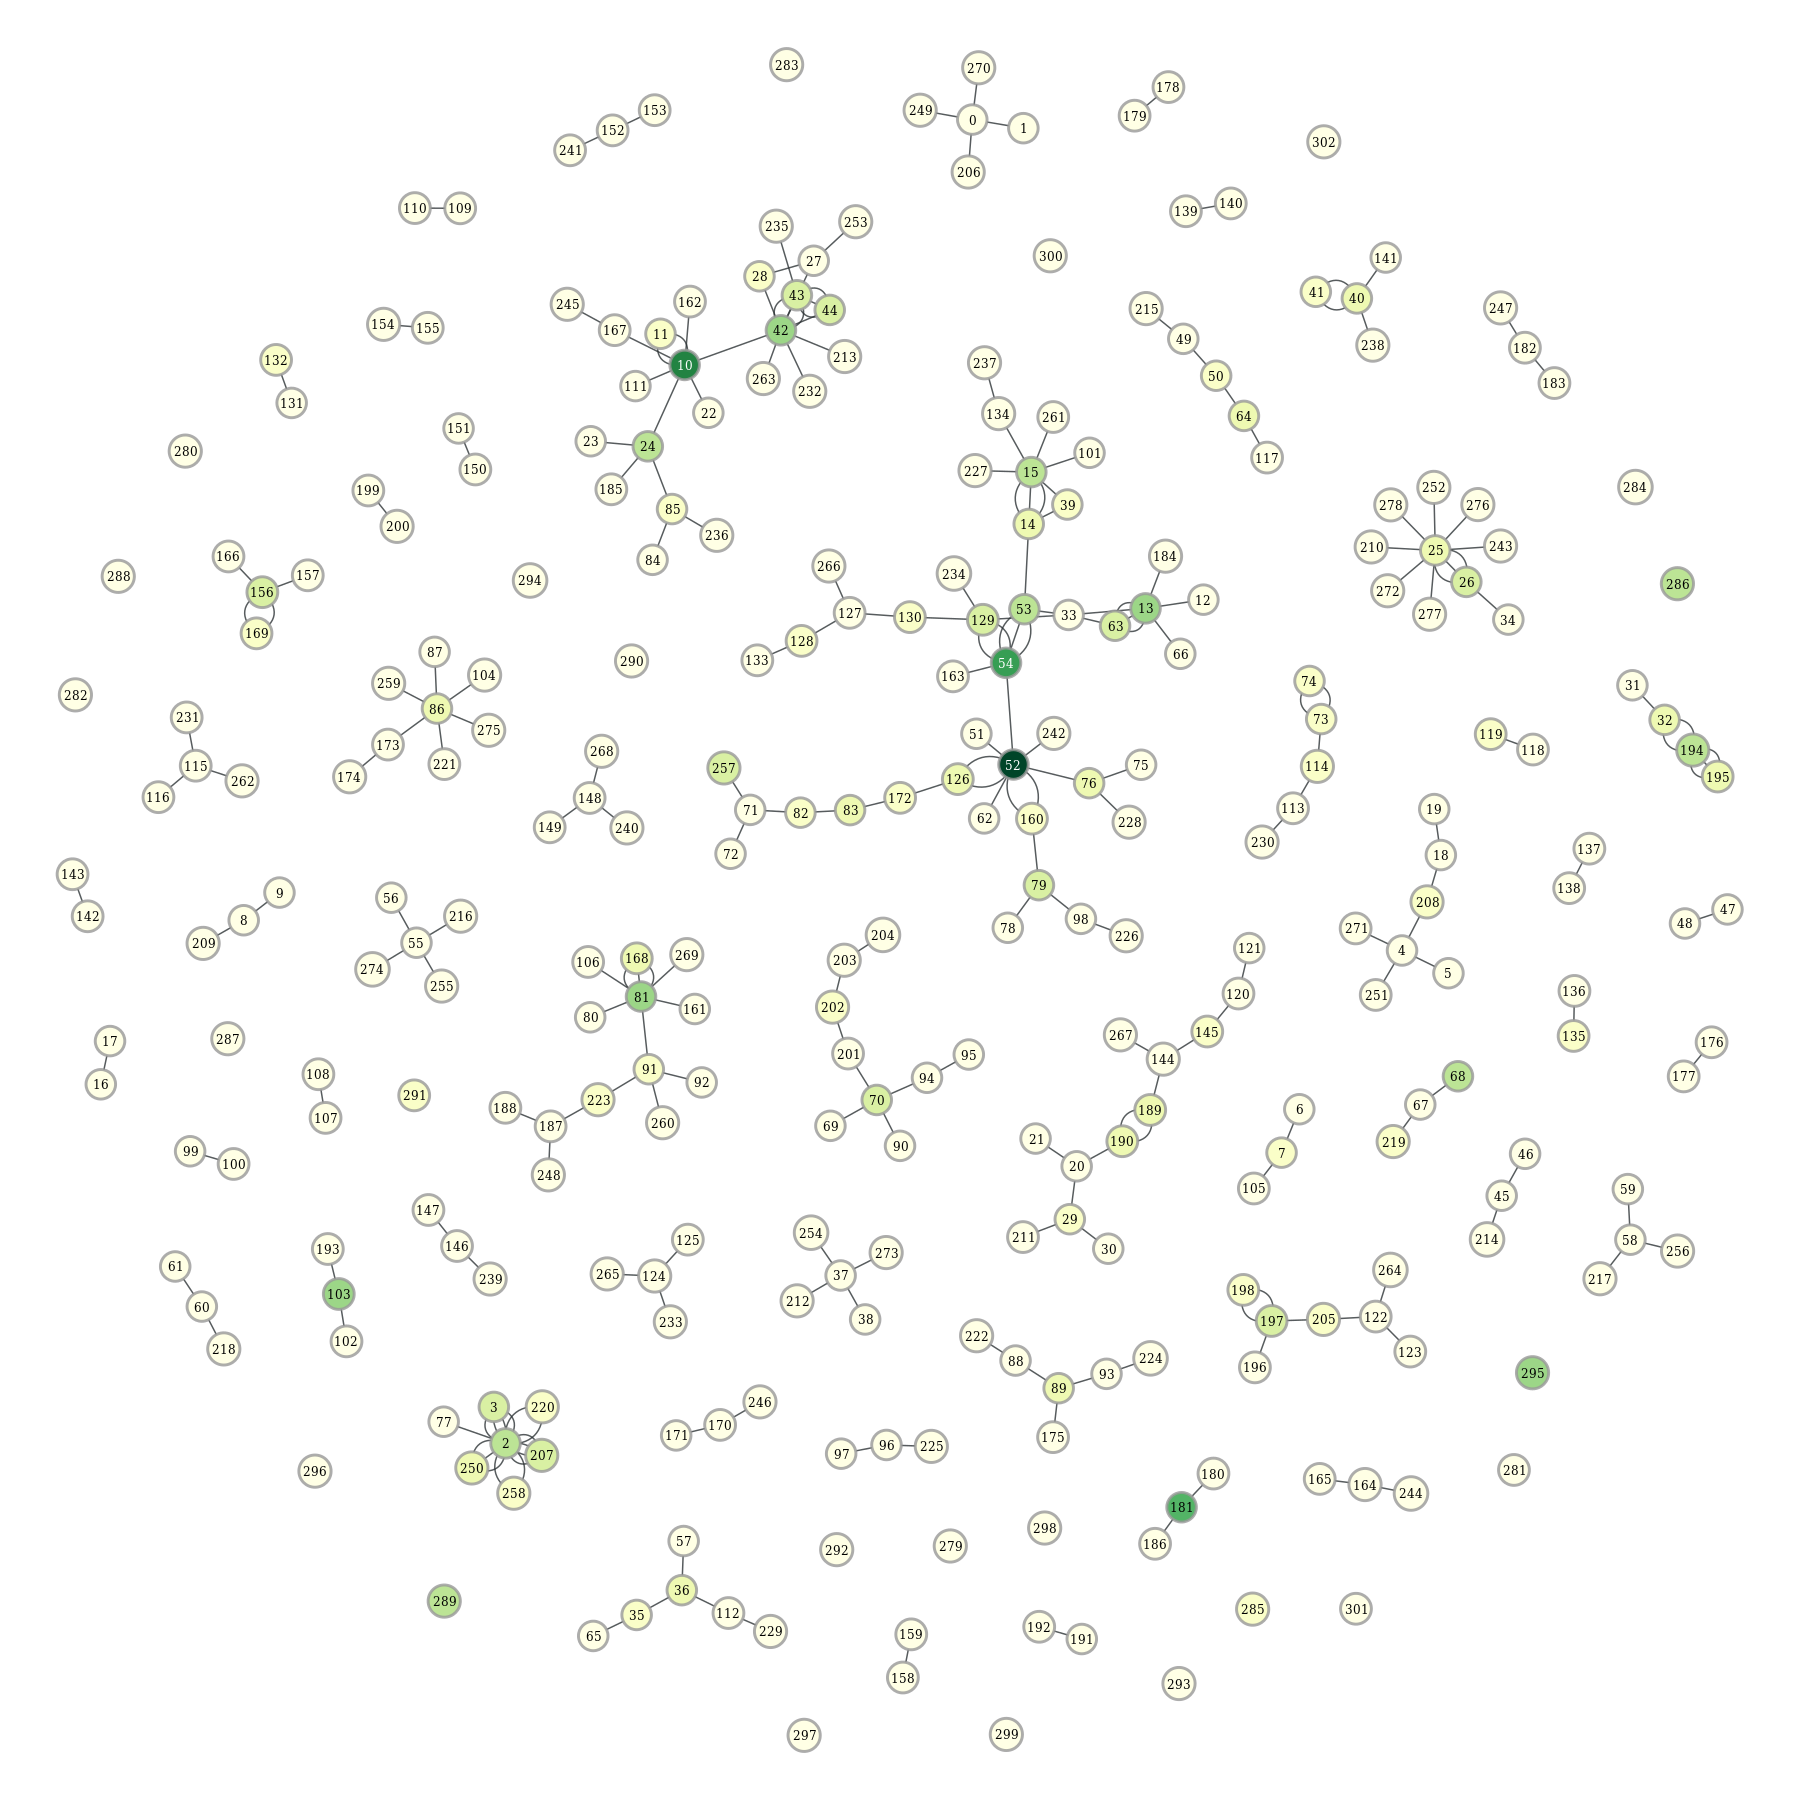

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fa5d9595668, at 0x7fa5d9583390>

In [82]:
# Desenhando o grafo
graph_draw(g, output_size=(1800,1800), vcmap=mpl.cm.YlGn, vertex_fill_color=vcolor, vertex_text=g.vertex_index, edge_pen_width=1.5)

## Elaborando o grafo dos componentes

### Maior componente

In [83]:
# Extraindo o maior componente do grafo
largest = topology.label_largest_component(g)

In [84]:
# Filtrando o grafo pelo maior componente
g.set_vertex_filter(largest)

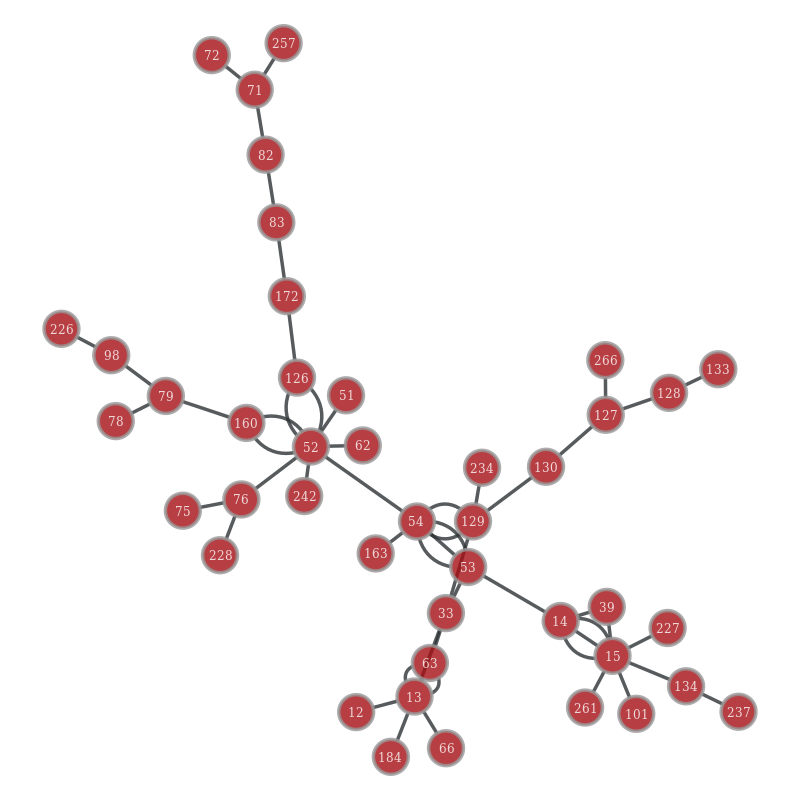

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fa5d9595668, at 0x7fa5d9536780>

In [85]:
# Desenhando o maior componente
graph_draw(g, output_size=(800, 800), vertex_text=g.vertex_index)

### Outros componentes

In [86]:
# Retirando o filtro utilizado anteriormente
# O objeto de grafo g retorna a seu tamanho anterior (completo)
g.set_vertex_filter(None)

In [87]:
# Extraindo os componentes do grafo

# A função retorna dois objetos: um mapa de propriedades das vértices (comp) e um histograma (hist), este último utilizado para os gráficos
comp, hist = topology.label_components(g)

In [88]:
# Extraindo um componente do grafo (no caso, o componente que contém o vértice 86)
comp1 = topology.label_out_component(g, g.vertex(86))

In [89]:
# Filtrando o grafo pelo componente selecionado
g.set_vertex_filter(comp1)

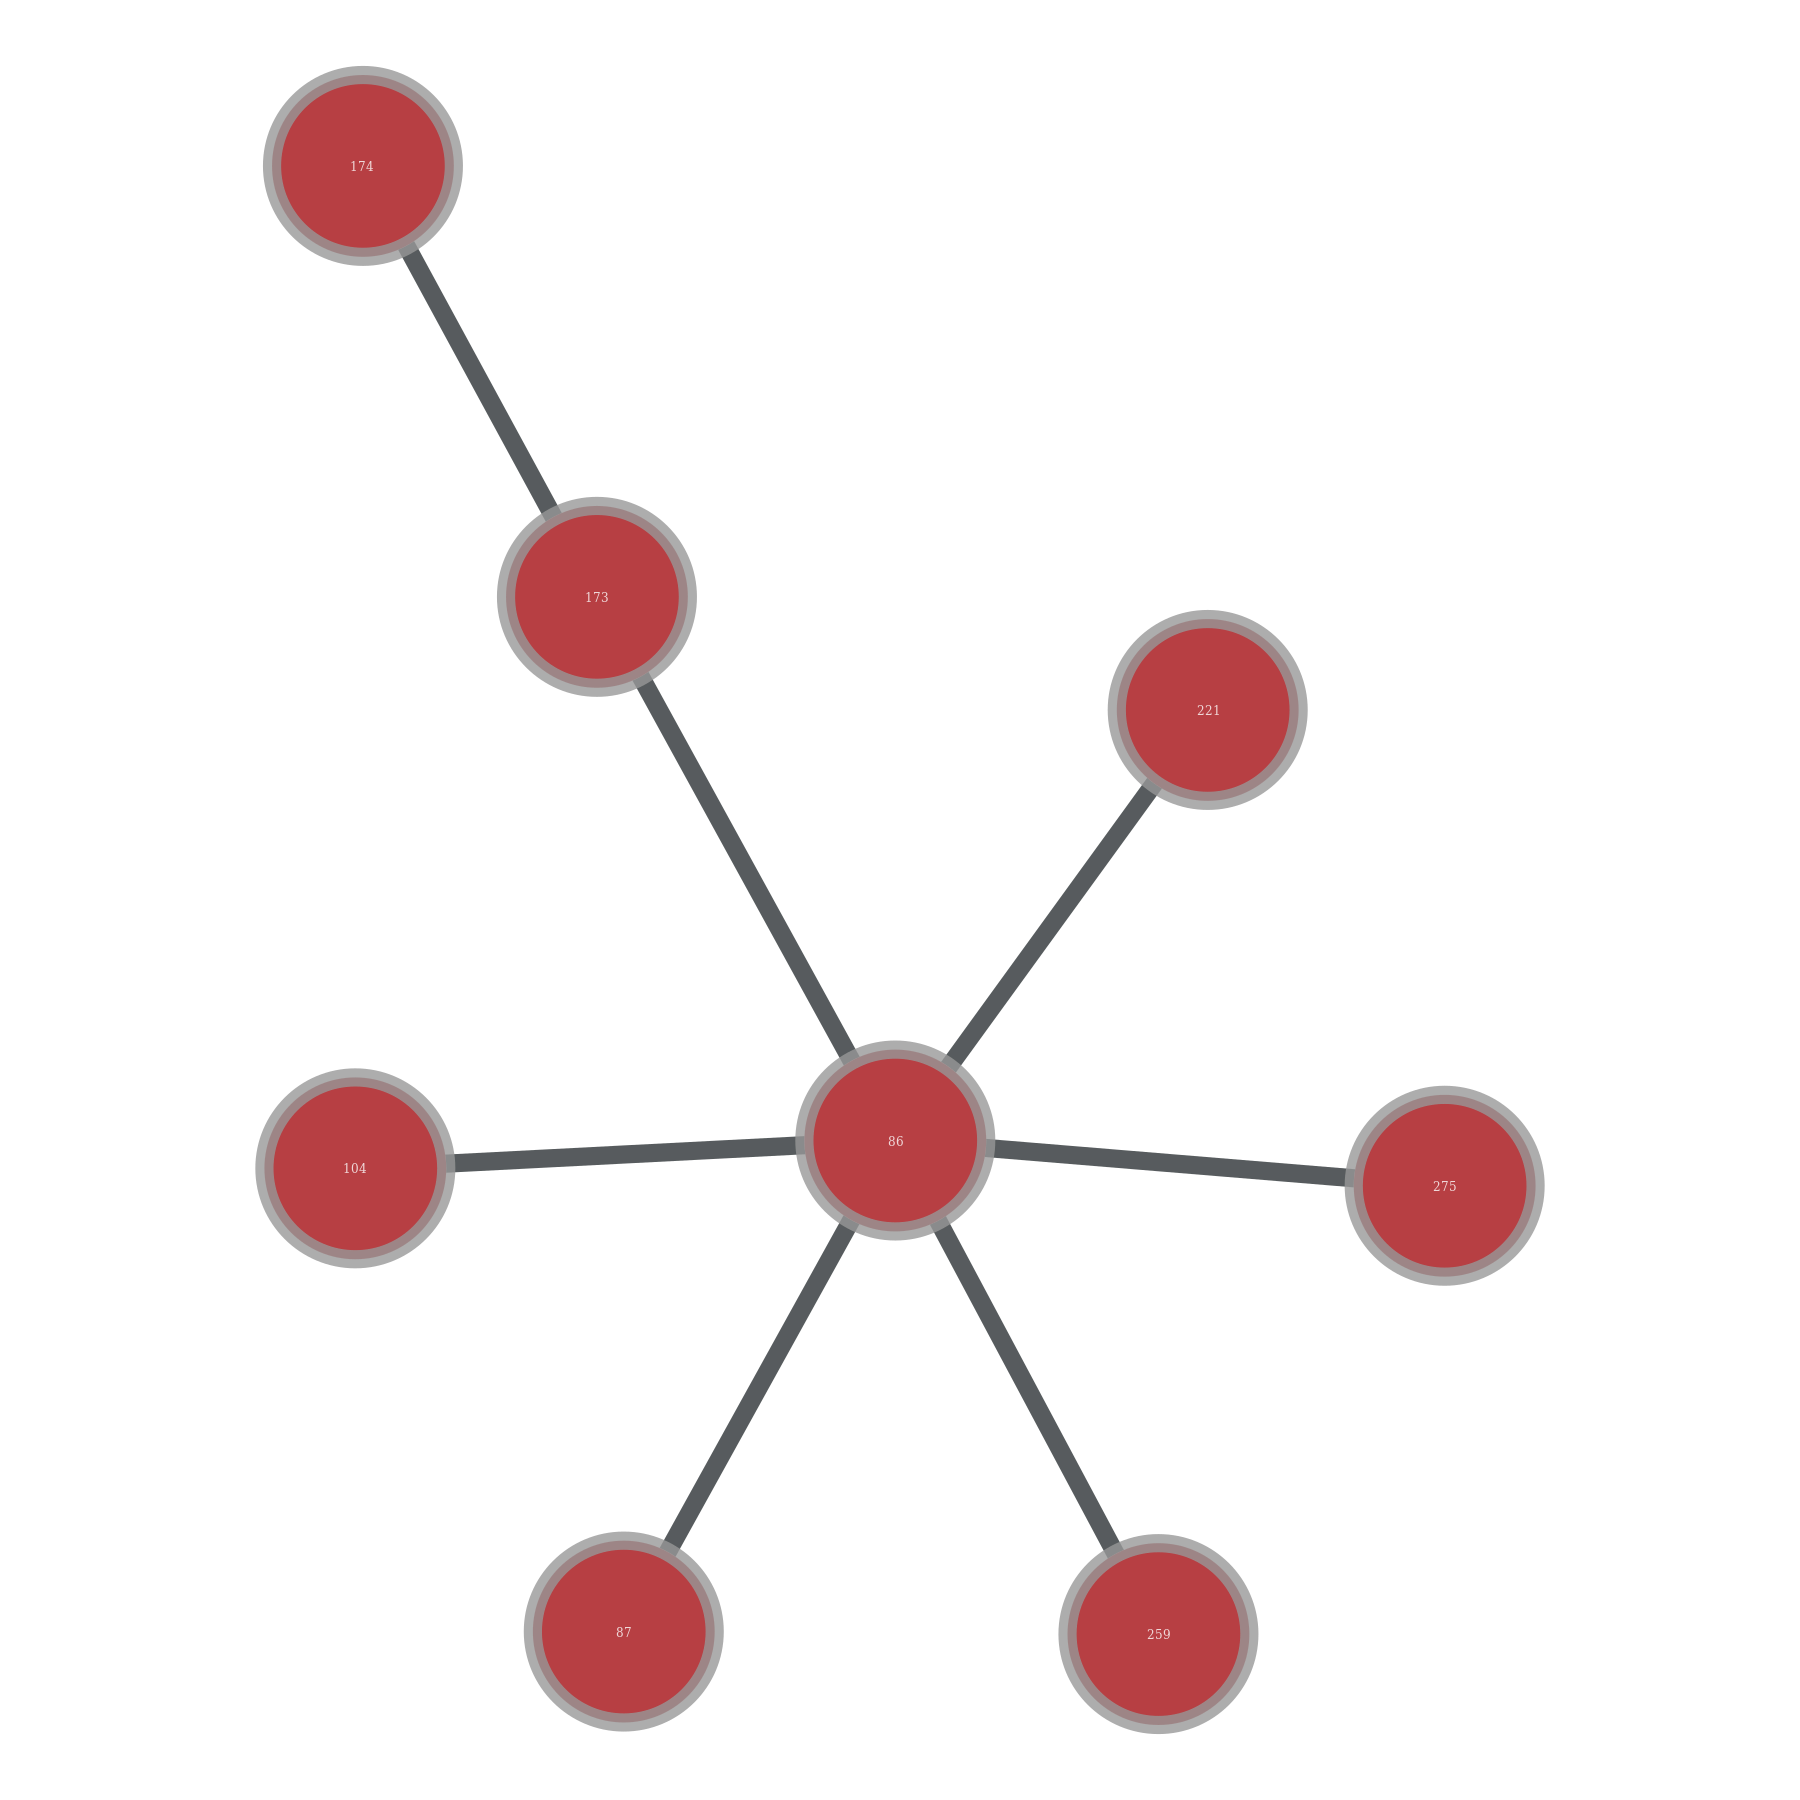

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fa5d9595668, at 0x7fa5d95278d0>

In [90]:
# Desenhando o componente selecionado
graph_draw(g, output_size=(1800, 1800), vertex_text=g.vertex_index)

### Elaborando os gráficos

In [91]:
# Verificando o vetor do histograma
pd.Series(hist).value_counts()

1     24
2     18
3     13
4      7
5      5
7      3
6      2
43     1
23     1
13     1
12     1
10     1
9      1
8      1
dtype: int64

Gráfico 1

Observações:
- O graph-tool cria os componentes arbitrariamente, associando eles com um número entre 0 a (N-1), onde N é o número total de componentes. Assim, o número do componente é pouco significativo. Por exemplo, o componente número 11 é o que tem mais vértices (43).
- Eixo x mostra o número de vértices
- Eixo y mostra o número de componentes conforme o número de vértices que eles possuem. Ou seja, são mais de 20 componentes com 1 vértice, enquanto existe apenas um único componente com 43 vértices.

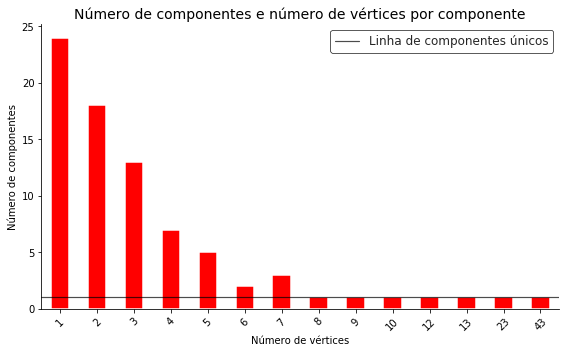

In [92]:
# Gráfico 1

fig, ax = plt.subplots(figsize=(8, 5))
sns.set_context('paper')
sns.set_style("white", {"xtick.major.size": 2, "ytick.major.size": 2})
sns.despine()
mpl.rcParams['font.family'] = 'sans-serif'

# Informando os dados para plotar
pd.Series(hist).value_counts().sort_index().plot(kind='bar',
                                                 subplots=True,
                                                 color='red',
                                                 ax=ax,
                                                 lw=1.5,
                                                 label='')

# Colocando o título
ax.set_title(label='Número de componentes e número de vértices por componente',
             fontsize=14)

# Ajustando o nome do eixo x
plt.ylabel('Número de componentes')
plt.xlabel('Número de vértices')

# Ajustando os ticks dos eixos
ax.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(rotation=45)

# Colocando a média, mediana e uma linha para indicar componentes únicos
plt.axhline(y=1,
            color='black',
            linestyle='-',
            alpha=0.7,
            zorder=3,
            label='Linha de componentes únicos')

# Colocando a legenda
plt.legend(loc='upper right', fontsize=12,
           frameon=True).get_frame().set_edgecolor('black')

# Implementando o tight_layout
plt.tight_layout()

# Plotando
plt.show()

# Elaborando o grafo do IE-URFJ

## Grafo da rede completa

In [93]:
# Criando o grafo não direcionado e algumas propriedades dos vértices e edges
grj = Graph(directed=False)
eprop = grj.new_ep('int32_t')
for v in grj.vertices():
    grj.vp[v] = grj.new_vp('int32_t')

# Adicionando os edges
grj.add_edge_list(edgesrj, eprops=eprop, hashed=True)

# Verificando o grafo
grj

<Graph object, undirected, with 557 vertices and 517 edges at 0x7fa5d952bf28>

In [94]:
# Adicionando os vértices dos autores que não possuem coautor (artigos de 1 autor)
grj.add_vertex(len(np.unique(list(autoresrjid.values()))) - len(np.unique(edgesrj)))

# Verificando o grafo
grj

<Graph object, undirected, with 600 vertices and 517 edges at 0x7fa5d952bf28>

In [95]:
# Configuração para o tamanho do vértice ser associada ao número de artigos publicados por autor
vsize = grj.new_vp('int32_t')
vsize.a = ((np.array(referenciarj['nartigos'])) ** 1.7)
np.sqrt(max(vsize))

8.246211251235321

In [96]:
# Configuração para as cores dos vértices serem associadas ao número de artigos publicados pelo autor, em um gradiente
vcolor = grj.new_vp('double')
vcolor.a = referenciarj['nartigos']

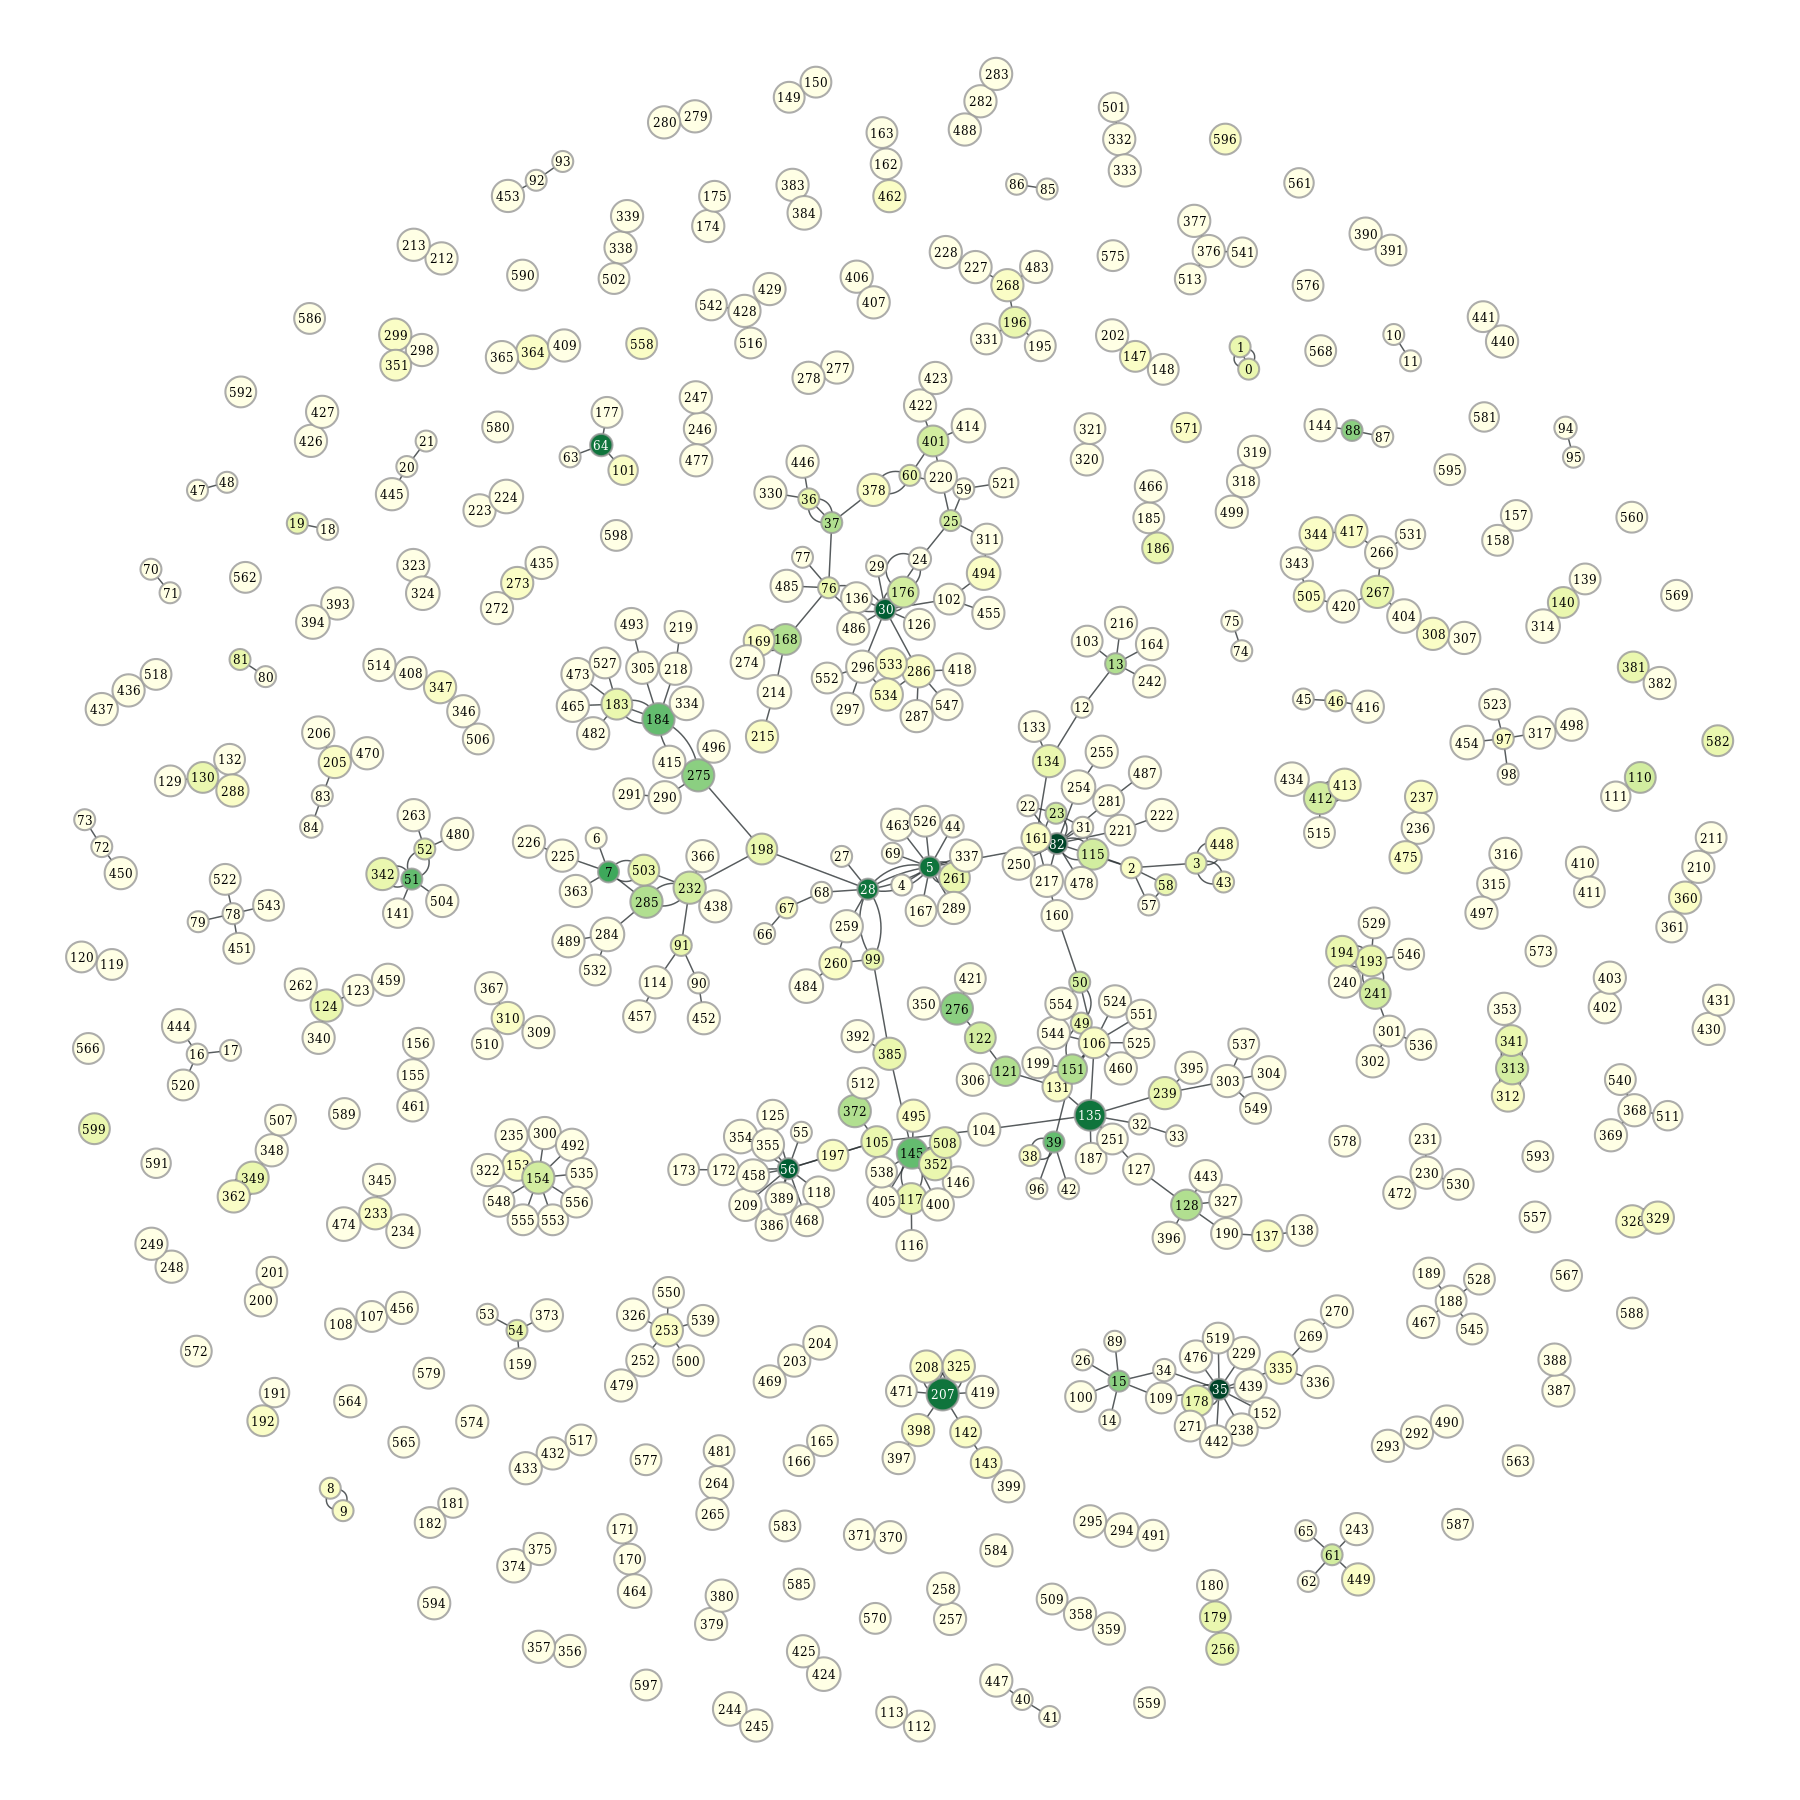

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fa5d952bf28, at 0x7fa5d95416d8>

In [97]:
# Desenhando o grafo
graph_draw(grj, output_size=(1800,1800), vcmap=mpl.cm.YlGn, vertex_fill_color=vcolor, vertex_text=grj.vertex_index, edge_pen_width=1.5)

## Elaborando o grafo dos componentes

### Maior componente

In [98]:
# Extraindo o maior componente do grafo
largest = topology.label_largest_component(grj)

In [99]:
# Filtrando o grafo pelo maior componente
grj.set_vertex_filter(largest)

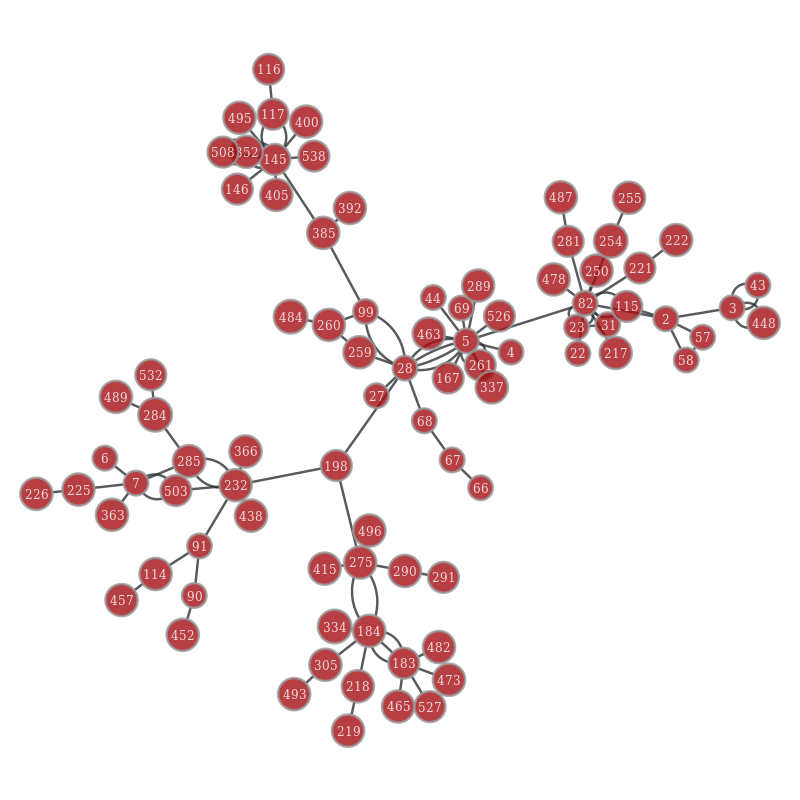

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fa5d952bf28, at 0x7fa5d9642208>

In [100]:
# Desenhando o maior componente
graph_draw(grj, output_size=(800, 800), vertex_text=grj.vertex_index)

### Outros componentes (extraindo o componente do grupo do Excedente)

In [101]:
# Retirando o filtro utilizado anteriormente
grj.set_vertex_filter(None)

In [102]:
# Extraindo os componentes do grafo

# A função retorna dois objetos: um mapa de propriedades das vértices (comp) e um histograma (hist), este último utilizado para os gráficos
comp, hist = topology.label_components(grj)

In [103]:
# Extraindo o componente relativo ao grupo do Excedente

# Buscando um ID de um autor pertencente ao grupo
referenciarj[referenciarj['autores'] == 'Serrano, Franklin']

ID            autores  nartigos
39  39  Serrano, Franklin         7

In [104]:
# Extraindo o componente que contém o vértice 39
comp1 = topology.label_out_component(grj, grj.vertex(39))

In [105]:
# Filtrando o grafo pelo componente selecionado
grj.set_vertex_filter(comp1)

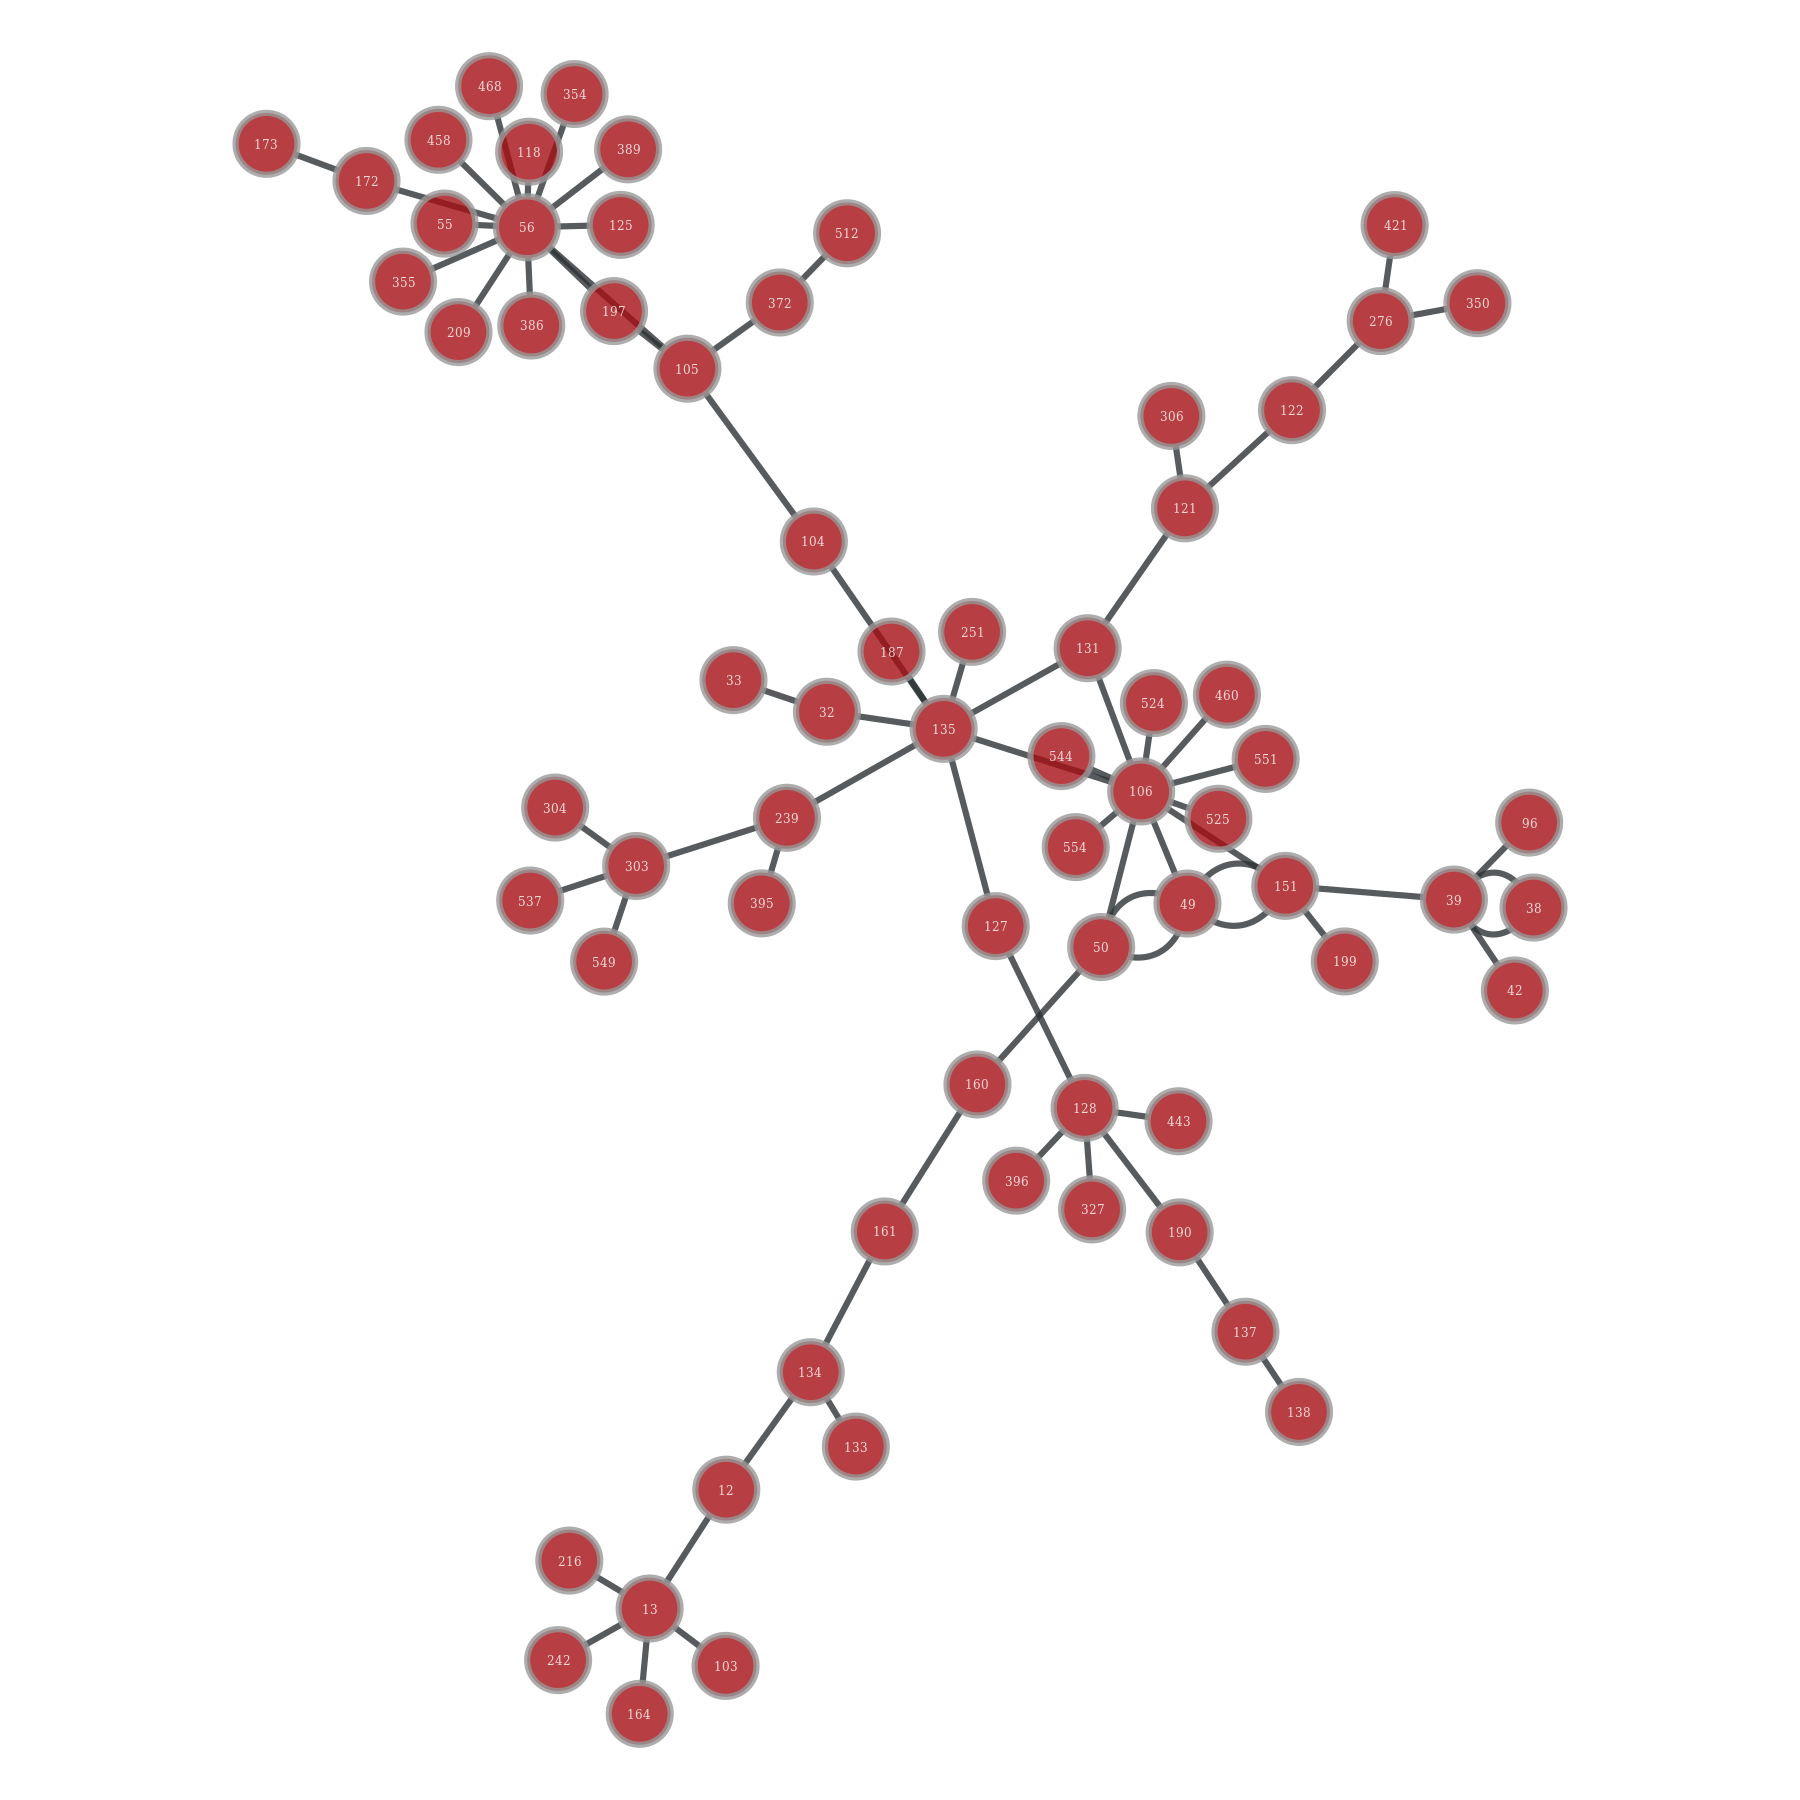

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fa5d952bf28, at 0x7fa5d95e05f8>

In [106]:
# Desenhando o componente selecionado
graph_draw(grj, output_size=(1800, 1800), vertex_text=grj.vertex_index)

### Elaborando os gráficos

In [107]:
# Verificando o vetor do histograma
pd.Series(hist).value_counts()

2     46
1     43
3     31
4     14
5      6
7      3
11     2
86     1
69     1
42     1
21     1
10     1
9      1
6      1
dtype: int64

Gráfico 2

Observações:
- O graph-tool cria os componentes arbitrariamente, associando eles com um número entre 0 a (N-1), onde N é o número total de componentes. Assim, o número do componente é pouco significativo. Por exemplo, o componente número 11 é o que tem mais vértices (43).
- Eixo x mostra o número de vértices
- Eixo y mostra o número de componentes conforme o número de vértices que eles possuem. Ou seja, são mais de 50 componentes com 1 vértice, enquanto existe apenas um único componente com 43 vértices.

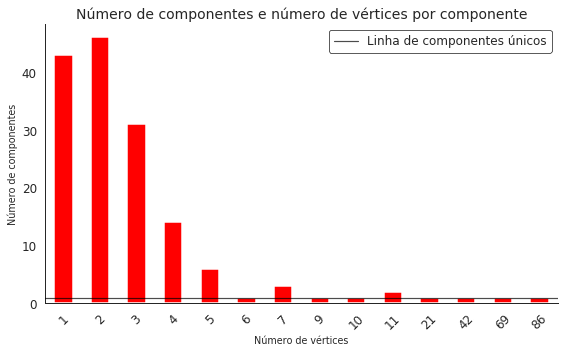

In [108]:
# Gráfico 2

fig, ax = plt.subplots(figsize=(8, 5))
sns.set_context('paper')
sns.set_style("white", {"xtick.major.size": 12, "ytick.major.size": 12})
sns.despine()
mpl.rcParams['font.family'] = 'sans-serif'

# Informando os dados para plotar
pd.Series(hist).value_counts().sort_index().plot(kind='bar',
                                                 subplots=True,
                                                 color='red',
                                                 ax=ax,
                                                 lw=1.5,
                                                 label='')

# Colocando o título
ax.set_title(label='Número de componentes e número de vértices por componente',
             fontsize=14)

# Ajustando o nome do eixo x
plt.ylabel('Número de componentes')
plt.xlabel('Número de vértices')
# Ajustando os ticks dos eixos
ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(rotation=45)

# Colocando a média, mediana e uma linha para indicar componentes únicos
plt.axhline(y=1,
            color='black',
            linestyle='-',
            alpha=0.7,
            zorder=3,
            label='Linha de componentes únicos')

# Colocando a legenda
plt.legend(loc='upper right', fontsize=12,
           frameon=True).get_frame().set_edgecolor('black')

# Implementando o tight_layout
plt.tight_layout()

# Plotando
plt.show()